In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

database = pd.DataFrame()

with open ('nfl.db.1.0.pkl', 'rb') as fl:
    database = pickle.load(fl)
fl.close

<function BufferedReader.close>

In [4]:
database = database.rename({'HOME/AWAY': 'HOME_OR_AWAY'}, axis=1)

In [6]:
%matplotlib inline

In [4]:
database.get_dtype_counts()

object     17
int64      34
float64     2
dtype: int64

In [7]:
database.columns.tolist()

['index_challenger',
 'First Downs_challenger',
 'Net Pass Yards_challenger',
 'Total Yards_challenger',
 'Turnovers_challenger',
 'Fourth Down Conv._challenger',
 'Time of Possession_challenger',
 'HOME/AWAY',
 'TEAM',
 '1',
 '2',
 '3',
 '4',
 'Final',
 'WEEK',
 'index_defender',
 'First Downs_defender',
 'Net Pass Yards_defender',
 'Total Yards_defender',
 'Turnovers_defender',
 'Third Down Conv._defender',
 'Fourth Down Conv._defender',
 'Time of Possession_defender',
 'PASS_CMP_challenger',
 'PASS_ATT_challenger',
 'PASS_YDs_challenger',
 'PASS_TDs_challenger',
 'PASS_INT_challenger',
 'PASS_CMP_defender',
 'PASS_ATT_defender',
 'PASS_YDs_defender',
 'PASS_TDs_defender',
 'PASS_INT_defender',
 'RUSH_ATT_challenger',
 'RUSH_YDS_challenger',
 'RUSH_TDs_challenger',
 'RUSH_ATT_defender',
 'RUSH_YDS_defender',
 'RUSH_TDs_defender',
 'SACKS_challenger',
 'SACK_YDs_challenger',
 'SACKS_defender',
 'SACK_YDs_defender',
 'FUMBLES_challenger',
 'FUMBLES_LOST_challenger',
 'FUMBLES_defender'

In [3]:
sub_selection = database[['index_challenger',\
                         'index_defender',\
                         'Final',\
                         'PASS_YDs_challenger',\
                         #'PASS_YDs_defender',\
                         #'PASS_TDs_defender',\
                         #'PASS_TDs_challenger',
                         #'SACKS_defender',
                         #'SACKS_challenger',
                         #'3rd_DWN_CONV_PCT_challenger',\
                         '3rd_DWN_CONV_PCT_defender']]

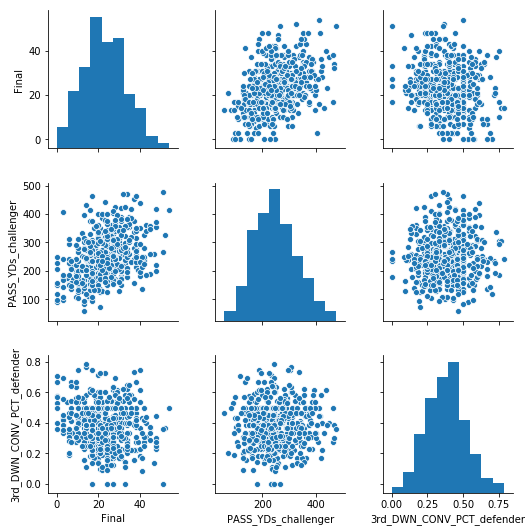

In [4]:
sns.pairplot(sub_selection)

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [6]:
database.corr()

,1,2,3,4,Final,WEEK,PASS_CMP_challenger,PASS_ATT_challenger,PASS_YDs_challenger,PASS_TDs_challenger,...,FUMBLES_challenger,FUMBLES_LOST_challenger,FUMBLES_defender,FUMBLES_LOST_defender,PENALTIES_challenger,PENALTY_YDs_challenger,PENALTIES_defender,PENALTY_YDs_defender,3rd_DWN_CONV_PCT_challenger,3rd_DWN_CONV_PCT_defender
1,1.000000,0.097875,0.090532,-0.045781,0.524829,-0.059810,-0.085758,-0.185066,0.123303,0.377125,...,-0.081718,-0.175781,0.067520,0.145301,-0.025302,-0.046124,0.051379,0.046210,0.257399,-0.122057
2,0.097875,1.000000,0.084296,-0.053536,0.620536,-0.060233,0.046153,-0.106423,0.231008,0.404337,...,-0.064573,-0.135253,0.014751,0.079545,-0.047654,-0.025297,0.102049,0.079009,0.277316,-0.132303
3,0.090532,0.084296,1.000000,-0.121346,0.471880,-0.018053,0.014216,-0.033590,0.186897,0.337284,...,-0.025791,-0.039362,0.056755,0.077915,-0.041317,-0.058073,-0.020899,-0.026028,0.208545,-0.033523
4,-0.045781,-0.053536,-0.121346,1.000000,0.399764,-0.041342,0.123598,0.076745,0.238311,0.288034,...,-0.013965,-0.005286,0.022384,0.031166,0.020989,0.036099,0.024195,0.048422,0.138720,-0.030935
Final,0.524829,0.620536,0.471880,0.399764,1.000000,-0.090023,0.056023,-0.120121,0.389828,0.694646,...,-0.092011,-0.176200,0.075410,0.161091,-0.046179,-0.042769,0.083903,0.078476,0.436042,-0.160581
WEEK,-0.059810,-0.060233,-0.018053,-0.041342,-0.090023,1.000000,-0.123694,-0.103539,-0.170611,-0.112663,...,-0.075852,-0.009279,-0.075852,-0.009279,-0.034105,-0.037678,-0.034105,-0.037678,-0.033366,-0.033366
PASS_CMP_challenger,-0.085758,0.046153,0.014216,0.123598,0.056023,-0.123694,1.000000,0.867033,0.754781,0.220136,...,0.112727,0.228980,-0.072615,-0.140679,0.063815,0.090540,-0.002503,0.003299,0.234471,0.081257
PASS_ATT_challenger,-0.185066,-0.106423,-0.033590,0.076745,-0.120121,-0.103539,0.867033,1.000000,0.634073,0.068609,...,0.083918,0.213285,-0.050749,-0.127650,0.117327,0.121805,0.036217,0.046499,0.080166,0.063146
PASS_YDs_challenger,0.123303,0.231008,0.186897,0.238311,0.389828,-0.170611,0.754781,0.634073,1.000000,0.521841,...,0.049122,0.102989,-0.076343,-0.080776,0.042391,0.059542,-0.025110,-0.038951,0.310840,0.050612
PASS_TDs_challenger,0.377125,0.404337,0.337284,0.288034,0.694646,-0.112663,0.220136,0.068609,0.521841,1.000000,...,-0.031739,-0.037399,0.083599,0.073315,-0.011396,-0.004960,0.054208,0.041067,0.348429,-0.020726


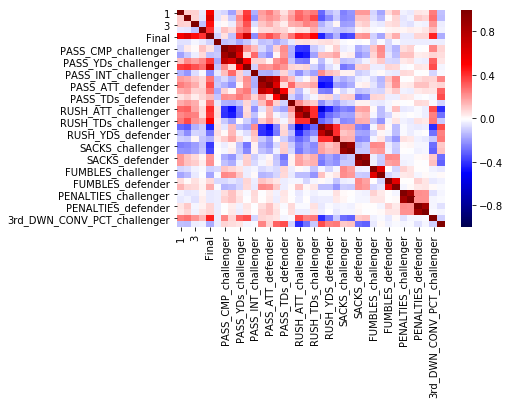

In [7]:


sns.heatmap(database.corr(), cmap="seismic",vmin=-1, vmax=1);

In [8]:
database['HOME/AWAY'].head()

0    HOME
1    AWAY
2    HOME
3    AWAY
4    HOME
Name: HOME/AWAY, dtype: object

## First Model

In [28]:
import patsy
#All in one model
y, X = patsy.dmatrices('Final ~ HOME_OR_AWAY +' +
                       #PASS_CMP_challenger +'\
                       #+' PASS_ATT_challenger + 
                       'PASS_YDs_challenger + PASS_TDs_challenger + ' +\
                       'PASS_INT_challenger + RUSH_ATT_challenger + RUSH_YDS_challenger + RUSH_TDs_challenger + ' +\
                       'RUSH_ATT_defender + RUSH_YDS_defender + RUSH_TDs_defender + ' +\
                       'SACKS_defender + SACK_YDs_defender + FUMBLES_defender + ' +\
                       'SACKS_challenger + SACK_YDs_challenger + FUMBLES_challenger + ' +\
                       'PENALTIES_challenger + PENALTY_YDs_challenger + ' +\
                        #'PASS_CMP_defender + PASS_ATT_defender + 
                       'PASS_YDs_defender + PASS_TDs_defender + ' +\
                       'PASS_INT_defender + RUSH_ATT_defender + RUSH_YDS_defender + RUSH_TDs_defender + ' +\
                       'SACKS_defender + SACK_YDs_defender + FUMBLES_defender + FUMBLES_LOST_defender + ' +\
                       'PENALTIES_defender + PENALTY_YDs_defender'
                       ,data=database, return_type='dataframe')

model = sm.OLS(y,X)

fit = model.fit()
                       


fit.summary()

"""I Took Pass completions and pass attempts out of the model because they were negative coefficients, and that didn't 
ring true to reality with me. After that change, the intercept fell by about a touchdown, which bodes true."""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     119.3
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          1.27e-181
Time:                        13:17:17   Log-Likelihood:                -1355.3
No. Observations:                 490   AIC:                             2761.
Df Residuals:                     465   BIC:                             2865.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.4987      2.874     -0.174      0.862      -6.146       5.149
HOME_OR_AWAY[T.HOME]      -0.0962      0.363     -0.265      0.791      -0.810       0.617
PASS_YDs_challenger        0.0176      0.003      5.056      0.000       0.011       0.024
PASS_TDs_challenger        5.0769      0.216     23.515      0.000       4.653       5.501
PASS_INT_challenger       -0.5405      0.205     -2.639      0.009      -0.943      -0.138
RUSH_ATT_challenger        0.1346      0.050      2.714      0.007       0.037       0.232
RUSH_YDS_challenger        0.0183      0.006      3.112      0.002       0.007       0.030
RUSH_TDs_challenger        4.8270      0.261     18.515      0.000       4.315       5.339
RUSH_ATT_defender         -0.0212      0.049     -0.430      0.667      -0.118       0.075
RUSH_YDS_defender         -0.0052      0.006     -0.892      0.373      -0.017       0.006
RUSH_TDs_defender          0.4605      0.263      1.752      0.080      -0.056       0.977
SACKS_defender             0.1087      0.245      0.443      0.658      -0.374       0.591
SACK_YDs_defender          0.0266      0.033      0.815      0.415      -0.038       0.091
FUMBLES_defender           0.0096      0.213      0.045      0.964      -0.409       0.428
SACKS_challenger          -0.1896      0.246     -0.772      0.441      -0.672       0.293
SACK_YDs_challenger       -0.0166      0.033     -0.508      0.612      -0.081       0.048
FUMBLES_challenger        -0.1144      0.173     -0.662      0.508      -0.454       0.225
PENALTIES_challenger      -0.0694      0.128     -0.540      0.589      -0.322       0.183
PENALTY_YDs_challenger    -0.0071      0.013     -0.547      0.585      -0.033       0.018
PASS_YDs_defender          0.0001      0.004      0.041      0.967      -0.007       0.007
PASS_TDs_defender          0.5098      0.216      2.357      0.019       0.085       0.935
PASS_INT_defender          1.6145      0.205      7.877      0.000       1.212       2.017
FUMBLES_LOST_defender      1.0982      0.337      3.255      0.001       0.435       1.761
PENALTIES_defender        -0.1263      0.129     -0.983      0.326      -0.379       0.126
PENALTY_YDs_defender       0.0268      0.013      2.073      0.039       0.001       0.052
==============================================================================
Omnibus:                       31.941   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.736
Skew:                           0.594   Prob(JB):                     6.39e-09
Kurtosis:                       3.662   Cond. No.                     6.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance mat

In [16]:
"""
                       3rd_DWN_CONV_PCT_challenger
                       
                        + FUMBLES_LOST_challenger + ' +\
                        +  + ' +\
                       
                        +\
                       '  + 3rd_DWN_CONV_PCT_defender',\
                       
                       
"""

"\n                       \n                       \n                       'SACKS_challenger + SACK_YDs_challenger + FUMBLES_challenger + FUMBLES_LOST_challenger + ' +                       'PENALTIES_challenger + PENALTY_YDs_challenger + 3rd_DWN_CONV_PCT_challenger + PASS_CMP_defender + PASS_ATT_defender + PASS_YDs_defender + PASS_TDs_defender + ' +                       ' PASS_INT_defender + RUSH_ATT_defender + RUSH_YDS_defender + RUSH_TDs_defender + ' +                       ' SACKS_defender + SACK_YDs_defender + FUMBLES_defender + FUMBLES_LOST_defender + ' +                       ' PENALTIES_defender + PENALTY_YDs_defender + 3rd_DWN_CONV_PCT_defender',                       \n                       \n"

In [27]:
database['Final'].mean()

22.96938775510204

In [31]:
pd.options.display.max_columns = None
database.iloc[:4,:]

,index_challenger,First Downs_challenger,Net Pass Yards_challenger,Total Yards_challenger,Turnovers_challenger,Fourth Down Conv._challenger,Time of Possession_challenger,HOME_OR_AWAY,TEAM,1,2,3,4,Final,WEEK,index_defender,First Downs_defender,Net Pass Yards_defender,Total Yards_defender,Turnovers_defender,Third Down Conv._defender,Fourth Down Conv._defender,Time of Possession_defender,PASS_CMP_challenger,PASS_ATT_challenger,PASS_YDs_challenger,PASS_TDs_challenger,PASS_INT_challenger,PASS_CMP_defender,PASS_ATT_defender,PASS_YDs_defender,PASS_TDs_defender,PASS_INT_defender,RUSH_ATT_challenger,RUSH_YDS_challenger,RUSH_TDs_challenger,RUSH_ATT_defender,RUSH_YDS_defender,RUSH_TDs_defender,SACKS_challenger,SACK_YDs_challenger,SACKS_defender,SACK_YDs_defender,FUMBLES_challenger,FUMBLES_LOST_challenger,FUMBLES_defender,FUMBLES_LOST_defender,PENALTIES_challenger,PENALTY_YDs_challenger,PENALTIES_defender,PENALTY_YDs_defender,3rd_DWN_CONV_PCT_challenger,3rd_DWN_CONV_PCT_defender
0,PHI,18,119,232,2,0-0,32:10,HOME,Philadelphia Eagles,0,3,7,8,18,1,ATL,16,225,299,1,4-15,0-1,27:50,20,35,132,0,1,21,43,251,0,1,27,113,2,18,74,1,2,13,4,26,2,1,1,0,11,101,15,135,0.500000,0.266667
1,ATL,16,225,299,1,0-1,27:50,AWAY,Atlanta Falcons,3,3,0,6,12,1,PHI,18,119,232,2,8-16,0-0,32:10,21,43,251,0,1,20,35,132,0,1,18,74,1,27,113,2,4,26,2,13,1,0,2,1,15,135,11,101,0.266667,0.500000
2,MIN,19,227,343,1,0-1,31:09,HOME,Minnesota Vikings,3,7,14,0,24,1,SFO,20,237,327,4,5-13,0-0,28:51,20,36,244,2,0,15,33,261,1,3,32,116,0,25,90,0,3,17,3,24,1,1,3,1,7,52,3,21,0.411765,0.384615
3,SFO,20,237,327,4,0-0,28:51,AWAY,San Francisco 49ers,0,3,10,3,16,1,MIN,19,227,343,1,7-17,0-1,31:09,15,33,261,1,3,20,36,244,2,0,25,90,0,32,116,0,3,24,3,17,3,1,1,1,3,21,7,52,0.384615,0.411765


In [35]:
#Calculate Minutes TOP
int(database.iloc[0,6].split(':')[0]) + int(database.iloc[0,6].split(':')[1])/60

32.166666666666664

## Appending Time of Possesion to DB

In [8]:
import copy

In [9]:
time_db = copy.deepcopy(database)

In [10]:
time_db['TOP_int_challenger'] = database['Time of Possession_challenger'].apply(lambda top: int(top.split(':')[0]))
                                                                                
                                                                                
                                                                                
                                                                                

In [11]:
time_db.columns

Index(['index_challenger', 'First Downs_challenger',
       'Net Pass Yards_challenger', 'Total Yards_challenger',
       'Turnovers_challenger', 'Fourth Down Conv._challenger',
       'Time of Possession_challenger', 'HOME_OR_AWAY', 'TEAM', '1', '2', '3',
       '4', 'Final', 'WEEK', 'index_defender', 'First Downs_defender',
       'Net Pass Yards_defender', 'Total Yards_defender', 'Turnovers_defender',
       'Third Down Conv._defender', 'Fourth Down Conv._defender',
       'Time of Possession_defender', 'PASS_CMP_challenger',
       'PASS_ATT_challenger', 'PASS_YDs_challenger', 'PASS_TDs_challenger',
       'PASS_INT_challenger', 'PASS_CMP_defender', 'PASS_ATT_defender',
       'PASS_YDs_defender', 'PASS_TDs_defender', 'PASS_INT_defender',
       'RUSH_ATT_challenger', 'RUSH_YDS_challenger', 'RUSH_TDs_challenger',
       'RUSH_ATT_defender', 'RUSH_YDS_defender', 'RUSH_TDs_defender',
       'SACKS_challenger', 'SACK_YDs_challenger', 'SACKS_defender',
       'SACK_YDs_defender', 'FUMB

In [12]:
time_db.get_dtype_counts()

float64     2
int64      35
object     17
dtype: int64

In [55]:
with open ('nfl.db.1.1.pkl', 'wb') as fl:
    pickle.dump(time_db, fl)
fl.close()

## Adding TOP to model

In [57]:
y, X = patsy.dmatrices('Final ~ HOME_OR_AWAY +' +
                       #PASS_CMP_challenger +'\
                       #+' PASS_ATT_challenger + 
                       'PASS_YDs_challenger + PASS_TDs_challenger + ' +\
                       'PASS_INT_challenger + RUSH_ATT_challenger + RUSH_YDS_challenger + RUSH_TDs_challenger + ' +\
                       'RUSH_ATT_defender + RUSH_YDS_defender + RUSH_TDs_defender + ' +\
                       'SACKS_defender + SACK_YDs_defender + FUMBLES_defender + ' +\
                       'SACKS_challenger + SACK_YDs_challenger + FUMBLES_challenger + ' +\
                       'PENALTIES_challenger + PENALTY_YDs_challenger + ' +\
                        #'PASS_CMP_defender + PASS_ATT_defender + 
                       'PASS_YDs_defender + PASS_TDs_defender + ' +\
                       'PASS_INT_defender + RUSH_ATT_defender + RUSH_YDS_defender + RUSH_TDs_defender + ' +\
                       'SACKS_defender + SACK_YDs_defender + FUMBLES_defender + FUMBLES_LOST_defender + ' +\
                       'PENALTIES_defender + PENALTY_YDs_defender + TOP_int_challenger + TOP_int_defender'
                       ,data=time_db, return_type='dataframe')

model = sm.OLS(y,X)

fit = model.fit()
                       


fit.summary()

#Did not have a significant effect.. Seemed to raise the coefficent from negative, which is more in line with reality.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     114.7
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          7.40e-181
Time:                        13:47:11   Log-Likelihood:                -1354.6
No. Observations:                 490   AIC:                             2761.
Df Residuals:                     464   BIC:                             2870.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.6471      3.988      0.664      0.507      -5.189      10.483
HOME_OR_AWAY[T.HOME]      -0.1215      0.364     -0.334      0.739      -0.836       0.593
PASS_YDs_challenger        0.0196      0.004      5.026      0.000       0.012       0.027
PASS_TDs_challenger        5.0126      0.223     22.464      0.000       4.574       5.451
PASS_INT_challenger       -0.5500      0.205     -2.684      0.008      -0.953      -0.147
RUSH_ATT_challenger        0.1665      0.057      2.922      0.004       0.055       0.278
RUSH_YDS_challenger        0.0181      0.006      3.088      0.002       0.007       0.030
RUSH_TDs_challenger        4.7768      0.264     18.072      0.000       4.257       5.296
RUSH_ATT_defender         -0.0528      0.056     -0.935      0.350      -0.164       0.058
RUSH_YDS_defender         -0.0051      0.006     -0.877      0.381      -0.017       0.006
RUSH_TDs_defender          0.5097      0.266      1.914      0.056      -0.014       1.033
SACKS_defender             0.0964      0.246      0.393      0.695      -0.386       0.579
SACK_YDs_defender          0.0258      0.033      0.791      0.430      -0.038       0.090
FUMBLES_defender           0.0215      0.213      0.101      0.920      -0.397       0.440
SACKS_challenger          -0.1761      0.246     -0.716      0.474      -0.659       0.307
SACK_YDs_challenger       -0.0158      0.033     -0.484      0.628      -0.080       0.048
FUMBLES_challenger        -0.1135      0.173     -0.657      0.512      -0.453       0.226
PENALTIES_challenger      -0.0582      0.129     -0.452      0.652      -0.311       0.195
PENALTY_YDs_challenger    -0.0073      0.013     -0.567      0.571      -0.033       0.018
PASS_YDs_defender         -0.0018      0.004     -0.470      0.639      -0.010       0.006
PASS_TDs_defender          0.5742      0.224      2.568      0.011       0.135       1.014
PASS_INT_defender          1.6245      0.205      7.921      0.000       1.222       2.028
FUMBLES_LOST_defender      1.0624      0.339      3.136      0.002       0.397       1.728
PENALTIES_defender        -0.1392      0.129     -1.080      0.281      -0.393       0.114
PENALTY_YDs_defender       0.0272      0.013      2.107      0.036       0.002       0.053
TOP_int_challenger        -0.0531      0.047     -1.138      0.256      -0.145       0.039
TOP_int_defender          -0.0531      0.047     -1.138      0.256      -0.145       0.039
==============================================================================
Omnibus:                       32.183   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.357
Skew:                           0.591   Prob(JB):                     4.69e-09
Kurtosis:                       3.693

### I am going to remove number of penalties, and retain yards

In [58]:
y, X = patsy.dmatrices('Final ~ HOME_OR_AWAY +' +
                       #PASS_CMP_challenger +'\
                       #+' PASS_ATT_challenger + 
                       'PASS_YDs_challenger + PASS_TDs_challenger + ' +\
                       'PASS_INT_challenger + RUSH_ATT_challenger + RUSH_YDS_challenger + RUSH_TDs_challenger + ' +\
                       'RUSH_ATT_defender + RUSH_YDS_defender + RUSH_TDs_defender + ' +\
                       'SACKS_defender + SACK_YDs_defender + FUMBLES_defender + ' +\
                       'SACKS_challenger + SACK_YDs_challenger + FUMBLES_challenger + ' +\
                       #'PENALTIES_challenger + 
                       'PENALTY_YDs_challenger + ' +\
                        #'PASS_CMP_defender + PASS_ATT_defender + 
                       'PASS_YDs_defender + PASS_TDs_defender + ' +\
                       'PASS_INT_defender + RUSH_ATT_defender + RUSH_YDS_defender + RUSH_TDs_defender + ' +\
                       'SACKS_defender + SACK_YDs_defender + FUMBLES_defender + FUMBLES_LOST_defender + ' +\
                       #'PENALTIES_defender + 
                       'PENALTY_YDs_defender + TOP_int_challenger + TOP_int_defender'
                       ,data=time_db, return_type='dataframe')

model = sm.OLS(y,X)

fit = model.fit()
                       


fit.summary()

#Did not have a significant effect.. Seemed to raise the coefficent from negative, which is more in line with reality.




#'SACKS_defender + SACK_YDs_defender + FUMBLES_defender + FUMBLES_LOST_defender + ' +\
                       #'PENALTIES_defender + 
                       #'PENALTY_YDs_defender + 
        #RUSH_ATT_defender + 
        #'SACKS_defender + SACK_YDs_defender + FUMBLES_defender + ' +\
                       #'SACKS_challenger + SACK_YDs_challenger + FUMBLES_challenger + ' +\
                       #'PENALTIES_challenger + 
                       #'PENALTY_YDs_challenger + ' +\
                       #'PASS_CMP_defender + PASS_ATT_defender + 
                       #'PASS_YDs_defender + 
                    # RUSH_ATT_challenger + RUSH_YDS_challenger + RUSH_TDs_challenger + ' +\
                       #'RUSH_ATT_defender + 
                        #PASS_CMP_challenger +'\
                       #+' PASS_ATT_challenger + 
                       #'PASS_YDs_challenger + 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     124.7
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          1.18e-182
Time:                        13:51:31   Log-Likelihood:                -1355.3
No. Observations:                 490   AIC:                             2759.
Df Residuals:                     466   BIC:                             2859.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.1677      3.961      0.547      0.584      -5.615       9.951
HOME_OR_AWAY[T.HOME]      -0.1267      0.363     -0.349      0.728      -0.841       0.587
PASS_YDs_challenger        0.0195      0.004      5.035      0.000       0.012       0.027
PASS_TDs_challenger        5.0099      0.223     22.479      0.000       4.572       5.448
PASS_INT_challenger       -0.5491      0.205     -2.684      0.008      -0.951      -0.147
RUSH_ATT_challenger        0.1654      0.057      2.908      0.004       0.054       0.277
RUSH_YDS_challenger        0.0180      0.006      3.077      0.002       0.007       0.030
RUSH_TDs_challenger        4.7664      0.264     18.083      0.000       4.248       5.284
RUSH_ATT_defender         -0.0507      0.056     -0.900      0.369      -0.162       0.060
RUSH_YDS_defender         -0.0051      0.006     -0.866      0.387      -0.017       0.006
RUSH_TDs_defender          0.4931      0.266      1.856      0.064      -0.029       1.015
SACKS_defender             0.1084      0.245      0.442      0.658      -0.373       0.590
SACK_YDs_defender          0.0247      0.033      0.757      0.450      -0.039       0.089
FUMBLES_defender          -0.0099      0.211     -0.047      0.963      -0.425       0.405
SACKS_challenger          -0.1759      0.245     -0.717      0.474      -0.658       0.306
SACK_YDs_challenger       -0.0156      0.033     -0.478      0.633      -0.080       0.048
FUMBLES_challenger        -0.1184      0.172     -0.689      0.491      -0.456       0.219
PENALTY_YDs_challenger    -0.0129      0.007     -1.916      0.056      -0.026       0.000
PASS_YDs_defender         -0.0016      0.004     -0.419      0.676      -0.009       0.006
PASS_TDs_defender          0.5675      0.223      2.541      0.011       0.129       1.006
PASS_INT_defender          1.6199      0.205      7.912      0.000       1.218       2.022
FUMBLES_LOST_defender      1.0982      0.337      3.258      0.001       0.436       1.761
PENALTY_YDs_defender       0.0151      0.007      2.250      0.025       0.002       0.028
TOP_int_challenger        -0.0504      0.046     -1.086      0.278      -0.141       0.041
TOP_int_defender          -0.0504      0.046     -1.086      0.278      -0.141       0.041
==============================================================================
Omnibus:                       33.981   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.946
Skew:                           0.610   Prob(JB):                     1.28e-09
Kurtosis:                       3.719   Cond. No.                     1.57e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance mat

#### Did I just hack the P-values, because now both penalty yards are both less than .05?

In [15]:
import patsy
#Making a small model
fl.close()


df = pd.DataFrame()
with open('nfl.db.1.1.pkl', 'rb') as fl:
    df = pickle.load(fl)


y1, X1 = patsy.dmatrices('Final ~ HOME_OR_AWAY +' +
                       
                       'PASS_TDs_challenger + ' +\
                       'PASS_INT_challenger +' +\
                       
                       'RUSH_YDS_defender + RUSH_TDs_defender + ' +\
                       
                       'PASS_TDs_defender + ' +\
                       'PASS_INT_defender + ' +\
                       
                       'RUSH_YDS_defender + RUSH_TDs_defender + ' +\
                       
                       'TOP_int_challenger + TOP_int_defender'
                       ,data=df, return_type='dataframe')

model3 = sm.OLS(y1,X1)

fit3 = model3.fit()
                       


fit3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     92.51
Date:                Sat, 19 Jan 2019   Prob (F-statistic):           2.62e-92
Time:                        20:48:38   Log-Likelihood:                -1609.2
No. Observations:                 490   AIC:                             3236.
Df Residuals:                     481   BIC:                             3274.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0786      2.796      1.459      0.145      -1.415       9.572
HOME_OR_AWAY[T.HOME]     0.8063      0.595      1.356      0.176      -0.362       1.975
PASS_TDs_challenger      5.5074      0.257     21.416      0.000       5.002       6.013
PASS_INT_challenger     -1.2606      0.315     -3.998      0.000      -1.880      -0.641
RUSH_YDS_defender       -0.0250      0.007     -3.695      0.000      -0.038      -0.012
RUSH_TDs_defender        0.0151      0.379      0.040      0.968      -0.730       0.760
PASS_TDs_defender        0.4564      0.261      1.752      0.080      -0.056       0.968
PASS_INT_defender        1.8662      0.319      5.857      0.000       1.240       2.492
TOP_int_challenger       0.1896      0.039      4.868      0.000       0.113       0.266
TOP_int_defender         0.1896      0.039      4.868      0.000       0.113       0.266
==============================================================================
Omnibus:                       13.654   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.403
Skew:                           0.332   Prob(JB):                      0.00203
Kurtosis:                       2.591   Cond. No.                     7.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.53e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [12]:
df.corr()

,1,2,3,4,Final,WEEK,PASS_CMP_challenger,PASS_ATT_challenger,PASS_YDs_challenger,PASS_TDs_challenger,...,PENALTIES_challenger,PENALTY_YDs_challenger,PENALTIES_defender,PENALTY_YDs_defender,3rd_DWN_CONV_PCT_challenger,3rd_DWN_CONV_PCT_defender,TOP_float_challenger,TOP_float_defender,TOP_int_defender,TOP_int_challenger
1,1.000000,0.097875,0.090532,-0.045781,0.524829,-5.981023e-02,-0.085758,-0.185066,0.123303,0.377125,...,-0.025302,-0.046124,0.051379,0.046210,0.257399,-0.122057,1.587518e-01,1.587518e-01,0.158824,0.158824
2,0.097875,1.000000,0.084296,-0.053536,0.620536,-6.023307e-02,0.046153,-0.106423,0.231008,0.404337,...,-0.047654,-0.025297,0.102049,0.079009,0.277316,-0.132303,2.320688e-01,2.320688e-01,0.234725,0.234725
3,0.090532,0.084296,1.000000,-0.121346,0.471880,-1.805285e-02,0.014216,-0.033590,0.186897,0.337284,...,-0.041317,-0.058073,-0.020899,-0.026028,0.208545,-0.033523,1.020399e-01,1.020399e-01,0.101967,0.101967
4,-0.045781,-0.053536,-0.121346,1.000000,0.399764,-4.134218e-02,0.123598,0.076745,0.238311,0.288034,...,0.020989,0.036099,0.024195,0.048422,0.138720,-0.030935,7.001321e-02,7.001321e-02,0.069989,0.069989
Final,0.524829,0.620536,0.471880,0.399764,1.000000,-9.002349e-02,0.056023,-0.120121,0.389828,0.694646,...,-0.046179,-0.042769,0.083903,0.078476,0.436042,-0.160581,2.838047e-01,2.838047e-01,0.285295,0.285295
WEEK,-0.059810,-0.060233,-0.018053,-0.041342,-0.090023,1.000000e+00,-0.123694,-0.103539,-0.170611,-0.112663,...,-0.034105,-0.037678,-0.034105,-0.037678,-0.033366,-0.033366,3.194851e-17,3.194851e-17,-0.000505,-0.000505
PASS_CMP_challenger,-0.085758,0.046153,0.014216,0.123598,0.056023,-1.236941e-01,1.000000,0.867033,0.754781,0.220136,...,0.063815,0.090540,-0.002503,0.003299,0.234471,0.081257,2.309640e-01,2.309640e-01,0.233647,0.233647
PASS_ATT_challenger,-0.185066,-0.106423,-0.033590,0.076745,-0.120121,-1.035392e-01,0.867033,1.000000,0.634073,0.068609,...,0.117327,0.121805,0.036217,0.046499,0.080166,0.063146,8.785284e-02,8.785284e-02,0.090516,0.090516
PASS_YDs_challenger,0.123303,0.231008,0.186897,0.238311,0.389828,-1.706110e-01,0.754781,0.634073,1.000000,0.521841,...,0.042391,0.059542,-0.025110,-0.038951,0.310840,0.050612,1.679714e-01,1.679714e-01,0.172585,0.172585
PASS_TDs_challenger,0.377125,0.404337,0.337284,0.288034,0.694646,-1.126634e-01,0.220136,0.068609,0.521841,1.000000,...,-0.011396,-0.004960,0.054208,0.041067,0.348429,-0.020726,6.456006e-02,6.456006e-02,0.065707,0.065707


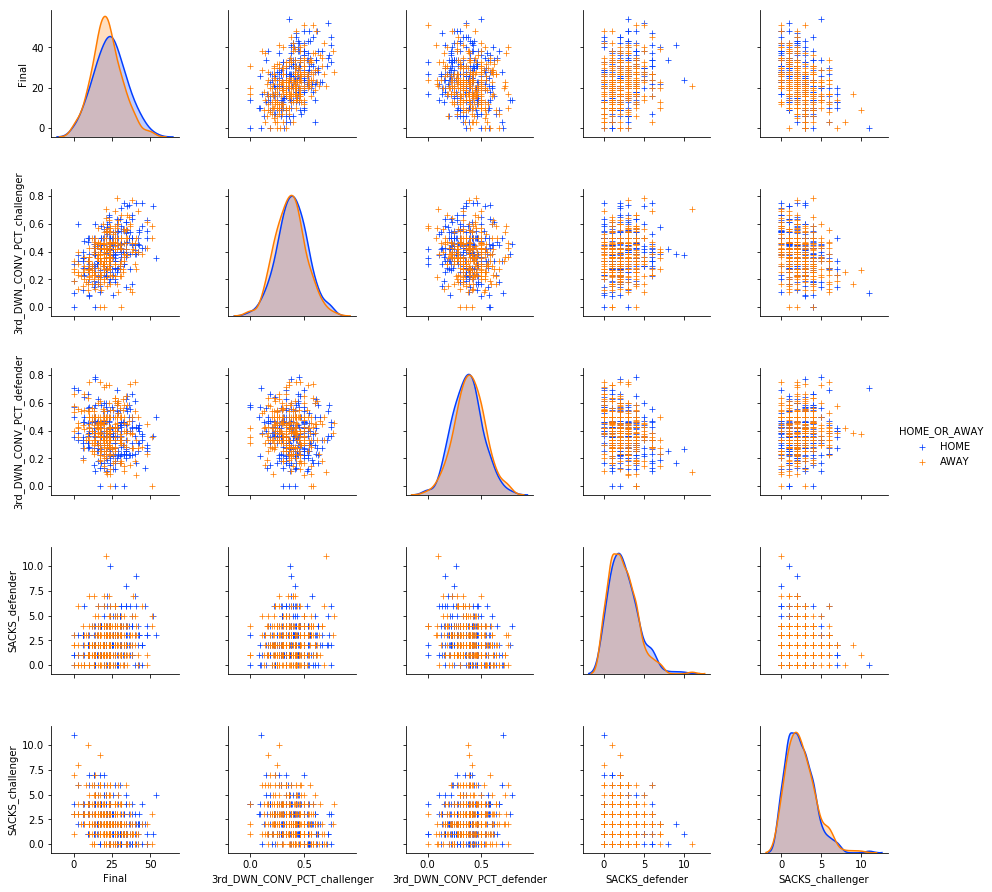

In [25]:
sns.pairplot(df[['Final', '3rd_DWN_CONV_PCT_challenger', '3rd_DWN_CONV_PCT_defender', 'HOME_OR_AWAY', 'SACKS_defender',\
                'SACKS_challenger']], hue='HOME_OR_AWAY',\
            markers='+', palette='bright')

#These are just too difficult too interpret, the data is too clustered

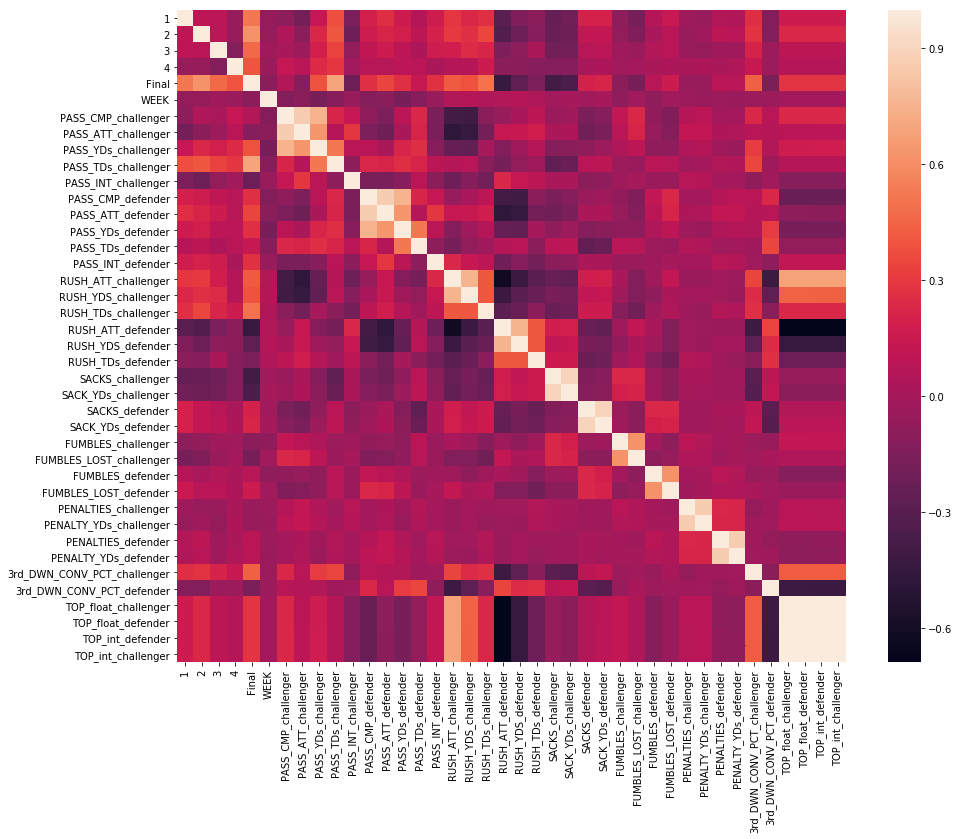

In [36]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.heatmap(df.corr(), ax=ax)
fig.savefig('heatmap.png')

 I Think I need to multiply Defenders TOP by negative 1, because they are being interpreted by the model as the same... I think I need to do regularization, or normalization.

# BASE MODEL 

In [58]:
#CHECK YOUR VALUES THEYRE DUPLICATED
y4, X4 = patsy.dmatrices('Final ~ HOME_OR_AWAY +' +
                       'PASS_CMP_challenger + '+\
                       'PASS_ATT_challenger + ' +\
                       'PASS_YDs_challenger + ' +\
                       'PASS_TDs_challenger + ' +\
                       'PASS_INT_challenger + ' +\
                       'RUSH_ATT_challenger + ' +\
                       'RUSH_YDS_challenger + ' +\
                       'RUSH_TDs_challenger + ' +\
                       'SACKS_defender + ' +\
                       'SACK_YDs_defender + ' +\
                       'FUMBLES_LOST_challenger + ' +\
                       'SACKS_challenger + ' +\
                       'SACK_YDs_challenger + ' +\
                       'FUMBLES_challenger + ' +\
                       'PENALTIES_challenger +' +\
                       'PENALTY_YDs_challenger + ' +\
                       'PASS_CMP_defender + ' +\
                       'PASS_ATT_defender + ' +\
                       'PASS_YDs_defender + ' +\
                       'PASS_TDs_defender + ' +\
                       'PASS_INT_defender + ' +\
                       'RUSH_ATT_defender + ' +\
                       'RUSH_YDS_defender + ' +\
                       'RUSH_TDs_defender + ' +\
                       'SACKS_defender + ' +\
                       'SACK_YDs_defender + ' +\
                       'FUMBLES_defender + ' +\
                       'FUMBLES_LOST_defender + ' +\
                       'PENALTIES_defender +' +\
                       'PENALTY_YDs_defender + ' +\
                       'TOP_int_challenger + ' +\
                       'TOP_int_defender'\
                       ,data=df, return_type='dataframe')

model_all_features = sm.OLS(y4,X4)

fit_all_features = model_all_features.fit()
                       


fit_all_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     99.49
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          3.80e-180
Time:                        19:56:04   Log-Likelihood:                -1343.7
No. Observations:                 490   AIC:                             2749.
Df Residuals:                     459   BIC:                             2879.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   3.7365      5.905      0.633      0.527      -7.867      15.340
HOME_OR_AWAY[T.HOME]       -0.0589      0.361     -0.163      0.871      -0.768       0.651
PASS_CMP_challenger        -0.0383      0.086     -0.445      0.657      -0.208       0.131
PASS_ATT_challenger        -0.1066      0.050     -2.133      0.033      -0.205      -0.008
PASS_YDs_challenger         0.0268      0.004      6.003      0.000       0.018       0.036
PASS_TDs_challenger         4.8138      0.229     21.053      0.000       4.364       5.263
PASS_INT_challenger        -0.5205      0.209     -2.489      0.013      -0.931      -0.110
RUSH_ATT_challenger         0.0334      0.071      0.469      0.640      -0.107       0.173
RUSH_YDS_challenger         0.0197      0.006      3.403      0.001       0.008       0.031
RUSH_TDs_challenger         4.6227      0.267     17.297      0.000       4.098       5.148
SACKS_defender              0.0649      0.248      0.262      0.793      -0.422       0.551
SACK_YDs_defender           0.0261      0.032      0.811      0.418      -0.037       0.089
FUMBLES_LOST_challenger    -0.6492      0.344     -1.888      0.060      -1.325       0.026
SACKS_challenger           -0.2932      0.247     -1.185      0.237      -0.779       0.193
SACK_YDs_challenger        -0.0136      0.032     -0.422      0.673      -0.077       0.050
FUMBLES_challenger          0.1250      0.214      0.584      0.559      -0.295       0.545
PENALTIES_challenger       -0.0863      0.128     -0.672      0.502      -0.339       0.166
PENALTY_YDs_challenger     -0.0080      0.013     -0.622      0.534      -0.033       0.017
PASS_CMP_defender          -0.1894      0.086     -2.192      0.029      -0.359      -0.020
PASS_ATT_defender           0.1355      0.050      2.712      0.007       0.037       0.234
PASS_YDs_defender          -0.0028      0.004     -0.623      0.534      -0.012       0.006
PASS_TDs_defender           0.7893      0.229      3.450      0.001       0.340       1.239
PASS_INT_defender           1.5316      0.209      7.323      0.000       1.121       1.943
RUSH_ATT_defender          -0.0334      0.072     -0.467      0.641      -0.174       0.107
RUSH_YDS_defender          -0.0081      0.006     -1.401      0.162      -0.020       0.003
RUSH_TDs_defender           0.7191      0.268      2.687      0.007       0.193       1.245
FUMBLES_defender            0.0398      0.214      0.186      0.853      -0.381       0.460
FUMBLES_LOST_defender       1.2262      0.344      3.566      0.000       0.550       1.902
PENALTIES_defender         -0.1831      0.128     -1.425      0.155      -0.435       0.069
PENALTY_YDs_defender        0.0350      0.013      2.722      0.007       0.010       0.060
TOP_int_challenger          0.0277      0.067  

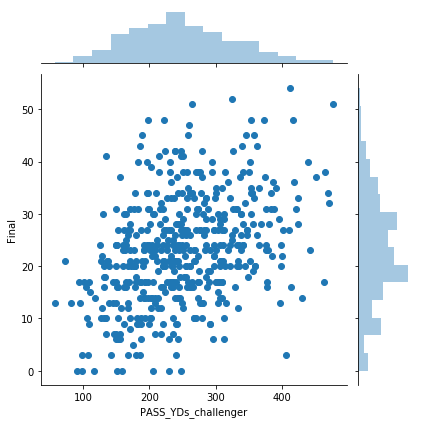

In [48]:
sns.jointplot('PASS_YDs_challenger', 'Final', data=df)

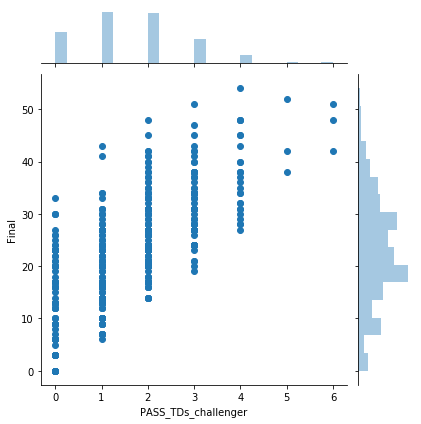

In [49]:
sns.jointplot('PASS_TDs_challenger', 'Final', data=df)

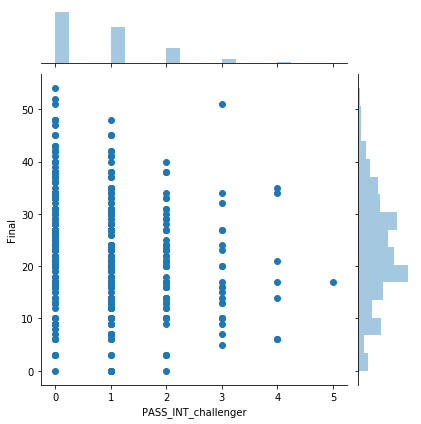

In [50]:
sns.jointplot('PASS_INT_challenger', 'Final', data=df)

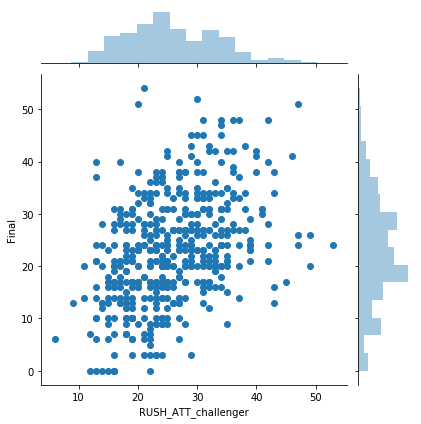

In [51]:
sns.jointplot('RUSH_ATT_challenger', 'Final', data=df)

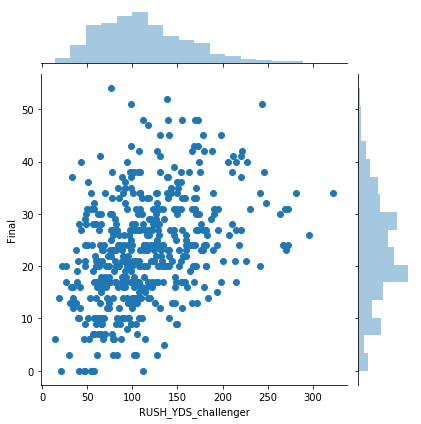

In [52]:
sns.jointplot('RUSH_YDS_challenger', 'Final', data=df)

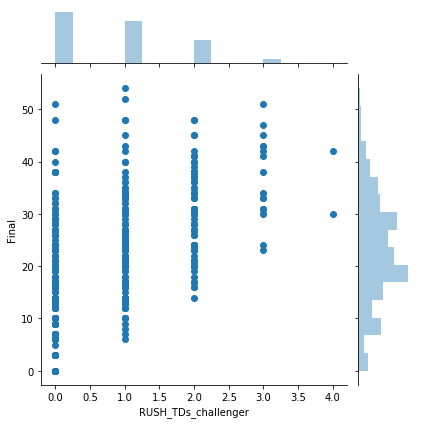

In [53]:
sns.jointplot('RUSH_TDs_challenger', 'Final', data=df)

I almost think we should take off the TDs in the model, as although they are useful when known... not useful when unknown

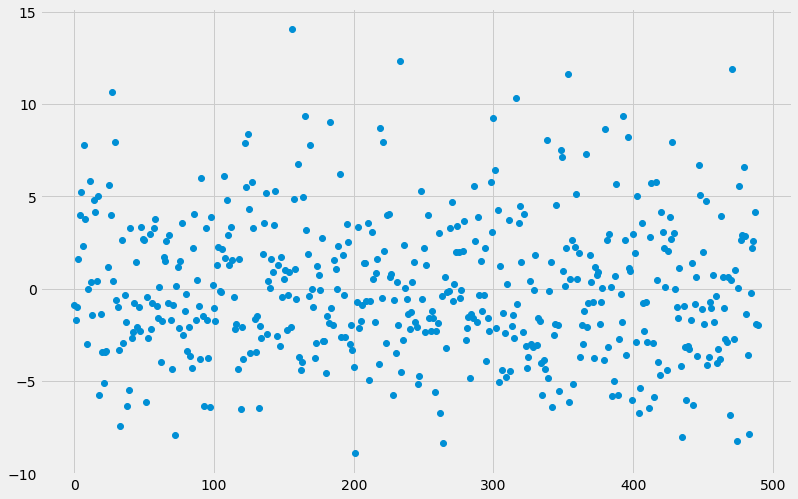

In [55]:
plt.style.use('fivethirtyeight')
fit_all_features.resid.plot(style='o', figsize=(12,8));

# Added Smaller Features

In [69]:


y5, X5 = patsy.dmatrices('Final ~ HOME_OR_AWAY +' +\
                       'PASS_CMP_challenger + '+\
                       'PASS_ATT_challenger + ' +\
                       'PASS_YDs_challenger + ' +\
                       'PASS_TDs_challenger + ' +\
                       'PASS_INT_challenger + ' +\
                       'RUSH_ATT_challenger + ' +\
                       'RUSH_YDS_challenger + ' +\
                       'RUSH_TDs_challenger + ' +\
                       ##'RUSH_ATT_defender + ' +\
                       #'RUSH_YDS_defender + ' +\
                       ##'RUSH_TDs_defender + ' +\
                       #'SACKS_challenger + ' +\
                       #'SACK_YDs_challenger + ' +\
                       #'SACKS_defender + ' +\
                       'SACK_YDs_defender + ' +\
                       #'FUMBLES_challenger + ' +\
                       'FUMBLES_LOST_challenger + ' +\
                       #'PENALTIES_challenger +' +\
                       'PENALTY_YDs_challenger + ' +\
                       ##'PASS_CMP_defender + ' +\
                       #'PASS_ATT_defender + ' +\
                       #'PASS_YDs_defender + ' +\
                       ##'PASS_TDs_defender + ' +\
                       #'PASS_INT_defender + ' +\
                       #'FUMBLES_defender + ' +\
                       'FUMBLES_LOST_defender + ' +\
                       #'PENALTIES_defender +' +\
                       #'TOP_int_defender + ' +\
                       'PENALTY_YDs_defender + ' +\
                       'TOP_int_challenger', data=df, return_type='dataframe')

model2 = sm.OLS(y5,X5)

fit = model2.fit()
                       


fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     164.5
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          6.76e-177
Time:                        20:12:12   Log-Likelihood:                -1390.2
No. Observations:                 490   AIC:                             2812.
Df Residuals:                     474   BIC:                             2880.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.4097      1.645     -0.249      0.803      -3.642       2.823
HOME_OR_AWAY[T.HOME]       -0.0762      0.385     -0.198      0.843      -0.832       0.680
PASS_CMP_challenger        -0.0398      0.088     -0.451      0.652      -0.213       0.133
PASS_ATT_challenger        -0.0675      0.052     -1.301      0.194      -0.169       0.034
PASS_YDs_challenger         0.0226      0.005      4.871      0.000       0.013       0.032
PASS_TDs_challenger         5.3739      0.230     23.322      0.000       4.921       5.827
PASS_INT_challenger        -0.4524      0.220     -2.058      0.040      -0.884      -0.021
RUSH_ATT_challenger         0.1589      0.070      2.272      0.024       0.021       0.296
RUSH_YDS_challenger         0.0127      0.006      2.098      0.036       0.001       0.025
RUSH_TDs_challenger         5.0702      0.276     18.356      0.000       4.527       5.613
SACK_YDs_defender           0.0207      0.015      1.336      0.182      -0.010       0.051
FUMBLES_LOST_challenger    -0.5162      0.282     -1.828      0.068      -1.071       0.039
PENALTY_YDs_challenger     -0.0099      0.007     -1.402      0.162      -0.024       0.004
FUMBLES_LOST_defender       1.0522      0.281      3.739      0.000       0.499       1.605
PENALTY_YDs_defender        0.0199      0.007      2.805      0.005       0.006       0.034
TOP_int_challenger          0.0525      0.103      0.510      0.610      -0.150       0.255
==============================================================================
Omnibus:                       77.383   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.073
Skew:                           0.970   Prob(JB):                     2.55e-28
Kurtosis:                       4.569   Cond. No.                     2.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lars #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()
lars = Lars()

cross_val_score(lm, df[['PASS_YDs_challenger', 'PASS_CMP_challenger', 'PASS_ATT_challenger', 'PASS_TDs_challenger',\
                       'PASS_INT_challenger', 'RUSH_ATT_challenger', 'RUSH_YDS_challenger', 'RUSH_TDs_challenger',\
                       'SACK_YDs_defender', 'FUMBLES_LOST_challenger', 'FUMBLES_LOST_defender', 'PENALTY_YDs_defender',\
                       'TOP_int_challenger']], y=df[['Final']], cv=5, scoring='r2', verbose=4)


[CV]  ................................................................
[CV] ....................... , score=0.8397494038134767, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.7909356839995427, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8527125618602875, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8097489534884645, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=0.8303115300264313, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.8397494 , 0.79093568, 0.85271256, 0.80974895, 0.83031153])

In [66]:
##Polynomial Features do not help.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lars #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()
lars = Lars()

poly = PolynomialFeatures(4)

poly.fit(df[['PASS_YDs_challenger', 'PASS_CMP_challenger', 'PASS_ATT_challenger', 'PASS_TDs_challenger',\
                       'PASS_INT_challenger', 'RUSH_ATT_challenger', 'RUSH_YDS_challenger', 'RUSH_TDs_challenger',\
                       'SACK_YDs_defender', 'FUMBLES_LOST_challenger', 'FUMBLES_LOST_defender', 'PENALTY_YDs_defender',\
                       'TOP_int_challenger']])

cross_val_score(lars, poly.transform(df[['PASS_YDs_challenger', 'PASS_CMP_challenger', 'PASS_ATT_challenger', 'PASS_TDs_challenger',\
                       'PASS_INT_challenger', 'RUSH_ATT_challenger', 'RUSH_YDS_challenger', 'RUSH_TDs_challenger',\
                       'SACK_YDs_defender', 'FUMBLES_LOST_challenger', 'FUMBLES_LOST_defender', 'PENALTY_YDs_defender',\
                       'TOP_int_challenger']]), y=df[['Final']], cv=5, scoring='r2', verbose=4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ....................... , score=-637347682.0977098, total=   1.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ....................... , score=-6431400396650.045, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] ...................... , score=-2097479634761.7678, total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[CV] ...................... , score=-126661618820.16376, total=   1.1s
[CV]  ................................................................
[CV] ...................... , score=-310208076.24942696, total=   1.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.7s finished


array([-6.37347682e+08, -6.43140040e+12, -2.09747963e+12, -1.26661619e+11,
       -3.10208076e+08])

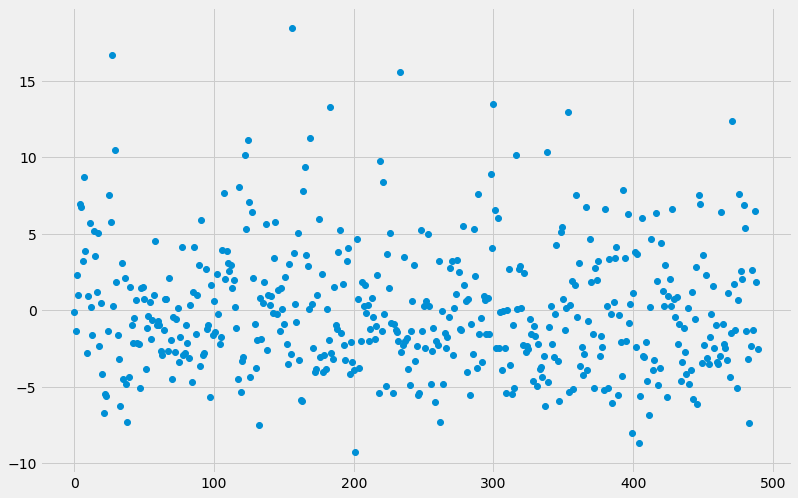

In [70]:
plt.style.use('fivethirtyeight')
fit.resid.plot(style='o', figsize=(12,8));

Residuals look okay, but there is that group that goes above five, that I would like to see if I can reign in

## Dummies

In [71]:
pd.get_dummies(df['index_challenger']).head()

,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,NYG,NYJ,OAK,PHI,PIT,SEA,SFO,TAM,TEN,WAS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
nfl_db = pd.DataFrame()
with open('nfl.db.1.1.pkl', 'rb') as fl:
    nfl_db = pickle.load(fl)

In [92]:
dummies_def = pd.get_dummies(nfl_db['index_defender'])

In [87]:
nfl_db.shape

(490, 57)

In [93]:
dummies_def.shape

(490, 32)

In [94]:
dummies_def.head()

,ARI,ATL,BAL,BUF,CAR,CHI,CIN,CLE,DAL,DEN,...,NYG,NYJ,OAK,PHI,PIT,SEA,SFO,TAM,TEN,WAS
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [95]:
nfl_db.head()

,index_challenger,First Downs_challenger,Net Pass Yards_challenger,Total Yards_challenger,Turnovers_challenger,Fourth Down Conv._challenger,Time of Possession_challenger,HOME_OR_AWAY,TEAM,1,...,PENALTIES_challenger,PENALTY_YDs_challenger,PENALTIES_defender,PENALTY_YDs_defender,3rd_DWN_CONV_PCT_challenger,3rd_DWN_CONV_PCT_defender,TOP_float_challenger,TOP_float_defender,TOP_int_defender,TOP_int_challenger
0,PHI,18,119,232,2,0-0,32:10,HOME,Philadelphia Eagles,0,...,11,101,15,135,0.500000,0.266667,32.166667,32.166667,32,32
1,ATL,16,225,299,1,0-1,27:50,AWAY,Atlanta Falcons,3,...,15,135,11,101,0.266667,0.500000,27.833333,27.833333,27,27
2,MIN,19,227,343,1,0-1,31:09,HOME,Minnesota Vikings,3,...,7,52,3,21,0.411765,0.384615,31.150000,31.150000,31,31
3,SFO,20,237,327,4,0-0,28:51,AWAY,San Francisco 49ers,0,...,3,21,7,52,0.384615,0.411765,28.850000,28.850000,28,28
4,MIA,18,222,342,2,0-1,30:25,HOME,Miami Dolphins,0,...,7,51,5,48,0.200000,0.428571,30.416667,30.416667,30,30


In [96]:
dummies_challenger = pd.get_dummies(nfl_db['index_challenger'])

In [97]:
dummies_challenger.shape

(490, 32)

In [101]:
all_dummies = dummies_challenger.merge(dummies_def, suffixes=('_challenger', '_defender'), left_index=True, right_index=True, validate='1:1')

In [103]:
home_fld = pd.get_dummies(nfl_db['HOME_OR_AWAY'])

In [104]:
home_fld.shape

(490, 2)

In [106]:
all_dumm_and_hm_fld = all_dummies.merge(home_fld, left_index=True, right_index=True, validate='1:1')

In [107]:
all_dumm_and_hm_fld.shape

(490, 66)

In [108]:
nfl_plus_dummies = nfl_db.merge(all_dumm_and_hm_fld, left_index=True, right_index=True, validate='1:1')

In [109]:
nfl_plus_dummies.to_pickle('nfl.db.2.0.w.dummies.pkl')

## Modeling with dummies

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lars #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lm = LinearRegression()
scaler = StandardScaler()

test_matrix = nfl_plus_dummies.drop(['Final', 'index_challenger', 'index_defender', 'HOME_OR_AWAY', 'TEAM',\
                                    'Fourth Down Conv._challenger', 'Third Down Conv._defender', 'Fourth Down Conv._defender',\
                                    'Time of Possession_defender', 'Time of Possession_challenger', '1', '2', '3', '4'], axis=1)

X, y = test_matrix, nfl_plus_dummies['Final']

X, x_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=15)


X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(x_test.values)

lm_reg = Ridge(alpha=1)

#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')


Linear Regression val R^2: 0.773
Ridge Regression val R^2: 0.782


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


I added dummy variables for team and home field, and my regression scores went down. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


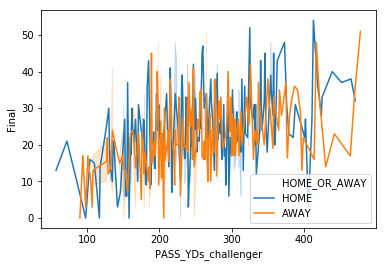

In [16]:
 import numpy as np
xs = np.arange(len(df))
sns.lineplot(x=df['PASS_YDs_challenger'], y=df['Final'], hue=df['HOME_OR_AWAY'])

In [126]:
features = nfl_plus_dummies.columns.tolist()

In [127]:
features

['index_challenger',
 'First Downs_challenger',
 'Net Pass Yards_challenger',
 'Total Yards_challenger',
 'Turnovers_challenger',
 'Fourth Down Conv._challenger',
 'Time of Possession_challenger',
 'HOME_OR_AWAY',
 'TEAM',
 '1',
 '2',
 '3',
 '4',
 'Final',
 'WEEK',
 'index_defender',
 'First Downs_defender',
 'Net Pass Yards_defender',
 'Total Yards_defender',
 'Turnovers_defender',
 'Third Down Conv._defender',
 'Fourth Down Conv._defender',
 'Time of Possession_defender',
 'PASS_CMP_challenger',
 'PASS_ATT_challenger',
 'PASS_YDs_challenger',
 'PASS_TDs_challenger',
 'PASS_INT_challenger',
 'PASS_CMP_defender',
 'PASS_ATT_defender',
 'PASS_YDs_defender',
 'PASS_TDs_defender',
 'PASS_INT_defender',
 'RUSH_ATT_challenger',
 'RUSH_YDS_challenger',
 'RUSH_TDs_challenger',
 'RUSH_ATT_defender',
 'RUSH_YDS_defender',
 'RUSH_TDs_defender',
 'SACKS_challenger',
 'SACK_YDs_challenger',
 'SACKS_defender',
 'SACK_YDs_defender',
 'FUMBLES_challenger',
 'FUMBLES_LOST_challenger',
 'FUMBLES_defend

In [147]:
feature_types = {'SCALARS': ['First Downs_challenger', 'Turnovers_challenger',\
                           'Turnovers_challenger', 'Final', 'WEEK', 'First Downs_defender',\
                           'PASS_CMP_challenger', 'PASS_ATT_challenger', 'PASS_INT_challenger',\
                           'PASS_CMP_defender', 'PASS_ATT_defender', 'PASS_INT_defender',\
                           'RUSH_ATT_challenger', 'RUSH_ATT_defender','SACKS_challenger', 'SACKS_defender',\
                           'FUMBLES_challenger', 'FUMBLES_LOST_challenger', 'FUMBLES_defender', 'FUMBLES_LOST_defender',\
                           'PENALTIES_challenger', 'PENALTIES_defender'],\
                
                'YARDS': ['Net Pass Yards_challenger', 'Total Yards_challenger', 'Net Pass Yards_defender',\
                         'Total Yards_defender', 'Turnovers_defender', 'PASS_YDs_challenger', 'RUSH_YDS_challenger'\
                         'PASS_YDs_defender', 'RUSH_YDS_defender', 'SACK_YDs_challenger', 'SACK_YDs_defender',\
                         'PENALTY_YDs_challenger', 'PENALTY_YDs_defender'],\
                
                'MINUTES': ['TOP_float_challenger','TOP_float_defender', 'TOP_int_defender', 'TOP_int_challenger'],\
                
                'SCORES': ['PASS_TDs_challenger', 'PASS_TDs_defender', 'RUSH_TDs_defender', 'RUSH_TDs_challenger'],
               
               'PERCENTAGE': ['3rd_DWN_CONV_PCT_challenger', '3rd_DWN_CONV_PCT_defender']}

In [217]:
def get_r_styntax(feature_dtype):
    return [feature + "  + " for feature in featre_types[feature_dtype]]

scalars_r_syntax = ''
yards_r_syntax = ''
minutes_r_syntax = ''
scores_r_syntax = ''
percentage_r_syntax = ''

for feature in get_r_styntax('SCALARS'):
    scalars_r_syntax += feature
for feature in get_r_styntax('YARDS'):
    yards_r_syntax += feature
for feature in get_r_styntax('MINUTES'):
    minutes_r_syntax += feature
for feature in get_r_styntax('SCORES'):
    scores_r_syntax += feature
for feature in get_r_styntax('PERCENTAGE'):
    percentage_r_syntax += feature
    
    
    
scalars_r_syntax + yards_r_syntax + minutes_r_syntax + scores_r_syntax + percentage_r_syntax

'First Downs_challenger  + Turnovers_challenger  + Turnovers_challenger  + Final  + WEEK  + First Downs_defender  + PASS_CMP_challenger  + PASS_ATT_challenger  + PASS_INT_challenger  + PASS_CMP_defender  + PASS_ATT_defender  + PASS_INT_defender  + RUSH_ATT_challenger  + RUSH_ATT_defender  + SACKS_challenger  + SACKS_defender  + FUMBLES_challenger  + FUMBLES_LOST_challenger  + FUMBLES_defender  + FUMBLES_LOST_defender  + PENALTIES_challenger  + PENALTIES_defender  + Net Pass Yards_challenger  + Total Yards_challenger  + Net Pass Yards_defender  + Total Yards_defender  + Turnovers_defender  + PASS_YDs_challenger  + RUSH_YDS_challengerPASS_YDs_defender  + RUSH_YDS_defender  + SACK_YDs_challenger  + SACK_YDs_defender  + PENALTY_YDs_challenger  + PENALTY_YDs_defender  + TOP_float_challenger  + TOP_float_defender  + TOP_int_defender  + TOP_int_challenger  + PASS_TDs_challenger  + PASS_TDs_defender  + RUSH_TDs_defender  + RUSH_TDs_challenger  + 3rd_DWN_CONV_PCT_challenger  + 3rd_DWN_CONV_PCT_

One last large model to see of coeficents chaged from initial

In [228]:
#CHECK YOUR VALUES THEYRE DUPLICATED
y_5, X_5 = patsy.dmatrices('Final ~ HOME_OR_AWAY + Turnovers_challenger  + Turnovers_challenger + WEEK  + PASS_CMP_challenger  + PASS_ATT_challenger  + PASS_INT_challenger  + PASS_CMP_defender  + PASS_ATT_defender  + PASS_INT_defender  + RUSH_ATT_challenger  + RUSH_ATT_defender  + SACKS_challenger  + SACKS_defender  + FUMBLES_challenger  + FUMBLES_LOST_challenger  + FUMBLES_defender  + FUMBLES_LOST_defender  + PENALTIES_challenger  + PENALTIES_defender  + Turnovers_defender  + PASS_YDs_challenger  + RUSH_YDS_challenger + PASS_YDs_defender  + RUSH_YDS_defender  + SACK_YDs_challenger  + SACK_YDs_defender  + PENALTY_YDs_challenger  + PENALTY_YDs_defender  + TOP_float_challenger  + TOP_float_defender  + TOP_int_defender  + TOP_int_challenger  + PASS_TDs_challenger  + PASS_TDs_defender  + RUSH_TDs_defender  + RUSH_TDs_challenger'  
                           
                       ,data=nfl_plus_dummies, return_type='dataframe')

model_5 = sm.OLS(y_5,X_5)

fit_5 = model_5.fit()
                       


fit_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     75.21
Date:                Mon, 21 Jan 2019   Prob (F-statistic):          6.00e-173
Time:                        09:53:03   Log-Likelihood:                -1337.3
No. Observations:                 490   AIC:                             2757.
Df Residuals:                     449   BIC:                             2929.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.5135      6.064      0.744      0.457      -7.404      16.431
HOME_OR_AWAY[T.HOME]         -0.0533      0.363     -0.147      0.883      -0.766       0.659
Turnovers_challenger[T.1]    -0.2738      0.430     -0.637      0.524      -1.118       0.571
Turnovers_challenger[T.2]     0.3614      0.502      0.719      0.472      -0.626       1.349
Turnovers_challenger[T.3]     0.4048      0.661      0.613      0.540      -0.894       1.703
Turnovers_challenger[T.4]    -0.5059      0.844     -0.600      0.549      -2.164       1.152
Turnovers_challenger[T.5]    -0.1926      0.975     -0.198      0.844      -2.109       1.724
Turnovers_defender[T.1]      -0.1787      0.431     -0.414      0.679      -1.026       0.669
Turnovers_defender[T.2]      -0.4104      0.502     -0.817      0.414      -1.398       0.577
Turnovers_defender[T.3]      -1.4418      0.661     -2.182      0.030      -2.741      -0.143
Turnovers_defender[T.4]      -1.1686      0.844     -1.385      0.167      -2.827       0.490
Turnovers_defender[T.5]       2.6369      0.975      2.704      0.007       0.721       4.553
WEEK                         -0.0267      0.037     -0.724      0.470      -0.099       0.046
PASS_CMP_challenger          -0.0503      0.088     -0.573      0.567      -0.223       0.122
PASS_ATT_challenger          -0.1045      0.050     -2.079      0.038      -0.203      -0.006
PASS_INT_challenger          -0.5680      0.231     -2.464      0.014      -1.021      -0.115
PASS_CMP_defender            -0.1872      0.088     -2.136      0.033      -0.360      -0.015
PASS_ATT_defender             0.1276      0.050      2.537      0.012       0.029       0.226
PASS_INT_defender             1.7354      0.231      7.529      0.000       1.282       2.188
RUSH_ATT_challenger           0.0282      0.072      0.393      0.695      -0.113       0.169
RUSH_ATT_defender            -0.0427      0.072     -0.594      0.553      -0.184       0.099
SACKS_challenger             -0.3166      0.249     -1.270      0.205      -0.807       0.173
SACKS_defender                0.0593      0.249      0.238      0.812      -0.431       0.549
FUMBLES_challenger            0.1263      0.217      0.581      0.562      -0.301       0.554
FUMBLES_LOST_challenger      -0.7552      0.361     -2.094      0.037      -1.464      -0.046
FUMBLES_defender              0.0786      0.218      0.361      0.718      -0.349       0.506
FUMBLES_LOST_defender         1.4499      0.361      4.021      0.000       0.741       2.158
PENALTIES_challenger         -0.0951      0.130     -0.733      0.464      -0.350       0.160
PENALTIES_defender           -0.2050      0.130     -1.579      0.115      -0.460       0.050
PASS_YDs_challenger           0.0272      0.005      6.028      0.000      

In [233]:
fit_5.mse_total
fit_5.mse_resid
fit_5.mse_resid

14.999120717082915

In [231]:
fit_5.nobs

490.0

In [234]:
fit_5.save('data/basic_model_statsm.pkl')

In [237]:
nfl_plus_dummies.head()
fit_5.fittedvalues()

,index_challenger,First Downs_challenger,Net Pass Yards_challenger,Total Yards_challenger,Turnovers_challenger,Fourth Down Conv._challenger,Time of Possession_challenger,HOME_OR_AWAY,TEAM,1,...,OAK_defender,PHI_defender,PIT_defender,SEA_defender,SFO_defender,TAM_defender,TEN_defender,WAS_defender,AWAY,HOME
0,PHI,18,119,232,2,0-0,32:10,HOME,Philadelphia Eagles,0,...,0,0,0,0,0,0,0,0,0,1
1,ATL,16,225,299,1,0-1,27:50,AWAY,Atlanta Falcons,3,...,0,1,0,0,0,0,0,0,1,0
2,MIN,19,227,343,1,0-1,31:09,HOME,Minnesota Vikings,3,...,0,0,0,0,1,0,0,0,0,1
3,SFO,20,237,327,4,0-0,28:51,AWAY,San Francisco 49ers,0,...,0,0,0,0,0,0,0,0,1,0
4,MIA,18,222,342,2,0-1,30:25,HOME,Miami Dolphins,0,...,0,0,0,0,0,0,1,0,0,1


This Model is Shite

### Creating the 'Large Subset Model'

In [243]:
#Make sure to .info and check for nulls
#create a pair plot

import patsy

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

#These are the values in the db
X_base_model = X_5
Y_base_model = y_5

X_nfl_train, X_test, y_nfl_train, y_test = train_test_split(X_base_model, Y_base_model, test_size=.2, random_state=42)
X_nfl_train, X_val, y_nfl_train, y_val = train_test_split(X_nfl_train, y_nfl_train, test_size=.25, random_state=23)

std_scaler.fit(X_nfl_train.values)

X_nfl_tr_std = std_scaler.transform(X_nfl_train.values)

X_nfl_test_std = std_scaler.transform(X_nfl_train.values)



numpy.ndarray

In [262]:
from sklearn.linear_model import Lasso
lasso_mdl = Lasso(alpha=.001)
lasso_mdl.fit(X_nfl_tr_std, y_nfl_train)

lasso_mdl.coef_
list(zip(X_base_model.columns, lasso_mdl.coef_))

[('Intercept', 0.0),
 ('HOME_OR_AWAY[T.HOME]', 0.1032917121070049),
 ('Turnovers_challenger[T.1]', -0.25839132714608165),
 ('Turnovers_challenger[T.2]', -0.0),
 ('Turnovers_challenger[T.3]', -0.022179464516850007),
 ('Turnovers_challenger[T.4]', 0.022504840850281916),
 ('Turnovers_challenger[T.5]', -0.12538701875994357),
 ('Turnovers_defender[T.1]', -0.005351076307289183),
 ('Turnovers_defender[T.2]', 0.23947199534812216),
 ('Turnovers_defender[T.3]', -0.0),
 ('Turnovers_defender[T.4]', 0.10812421226151385),
 ('Turnovers_defender[T.5]', 0.49702216860225035),
 ('WEEK', -0.41433832361113415),
 ('PASS_CMP_challenger', -0.52574729112927),
 ('PASS_ATT_challenger', -1.247623480145618),
 ('PASS_INT_challenger', -0.5592147041855249),
 ('PASS_CMP_defender', -1.2379329078843244),
 ('PASS_ATT_defender', 1.3567324051059229),
 ('PASS_INT_defender', 1.5012600150456785),
 ('RUSH_ATT_challenger', -0.055154850994321034),
 ('RUSH_ATT_defender', -0.0303547254873315),
 ('SACKS_challenger', -1.279990008340

# I dont like what I am seeing in either model, so I am going to remove features. 

In [266]:
nfl_db_lean.columns.tolist()

['First Downs_challenger',
 'Net Pass Yards_challenger',
 'Total Yards_challenger',
 'Turnovers_challenger',
 'Final',
 'First Downs_defender',
 'Net Pass Yards_defender',
 'Total Yards_defender',
 'Turnovers_defender',
 'PASS_CMP_challenger',
 'PASS_ATT_challenger',
 'PASS_YDs_challenger',
 'PASS_TDs_challenger',
 'PASS_INT_challenger',
 'PASS_CMP_defender',
 'PASS_ATT_defender',
 'PASS_YDs_defender',
 'PASS_TDs_defender',
 'PASS_INT_defender',
 'RUSH_ATT_challenger',
 'RUSH_YDS_challenger',
 'RUSH_TDs_challenger',
 'RUSH_ATT_defender',
 'RUSH_YDS_defender',
 'RUSH_TDs_defender',
 'SACKS_challenger',
 'SACK_YDs_challenger',
 'SACKS_defender',
 'SACK_YDs_defender',
 'FUMBLES_challenger',
 'FUMBLES_LOST_challenger',
 'FUMBLES_defender',
 'FUMBLES_LOST_defender',
 'PENALTIES_challenger',
 'PENALTY_YDs_challenger',
 'PENALTIES_defender',
 'PENALTY_YDs_defender',
 '3rd_DWN_CONV_PCT_challenger',
 '3rd_DWN_CONV_PCT_defender',
 'TOP_float_challenger',
 'TOP_float_defender',
 'TOP_int_defender

In [ ]:
nfl_final_db = nfl_db_lean.drop()

In [271]:
nfl_db.columns

Index(['index_challenger', 'First Downs_challenger',
       'Net Pass Yards_challenger', 'Total Yards_challenger',
       'Turnovers_challenger', 'Fourth Down Conv._challenger',
       'Time of Possession_challenger', 'HOME_OR_AWAY', 'TEAM', '1', '2', '3',
       '4', 'Final', 'WEEK', 'index_defender', 'First Downs_defender',
       'Net Pass Yards_defender', 'Total Yards_defender', 'Turnovers_defender',
       'Third Down Conv._defender', 'Fourth Down Conv._defender',
       'Time of Possession_defender', 'PASS_CMP_challenger',
       'PASS_ATT_challenger', 'PASS_YDs_challenger', 'PASS_TDs_challenger',
       'PASS_INT_challenger', 'PASS_CMP_defender', 'PASS_ATT_defender',
       'PASS_YDs_defender', 'PASS_TDs_defender', 'PASS_INT_defender',
       'RUSH_ATT_challenger', 'RUSH_YDS_challenger', 'RUSH_TDs_challenger',
       'RUSH_ATT_defender', 'RUSH_YDS_defender', 'RUSH_TDs_defender',
       'SACKS_challenger', 'SACK_YDs_challenger', 'SACKS_defender',
       'SACK_YDs_defender', 'FUMB

In [276]:
small_feature_set = ['Final', 'index_challenger', 'index_defender', 'TEAM',\

'Total Yards_challenger', 'Total Yards_defender', 

'Turnovers_challenger',  'Turnovers_defender',\

'PASS_CMP_challenger', 'PASS_CMP_defender',\

'PASS_TDs_challenger', 'PASS_TDs_defender',\

'PASS_INT_challenger', 'PASS_INT_defender',\

'RUSH_YDS_challenger', 'RUSH_YDS_defender',\

'RUSH_TDs_challenger', 'RUSH_TDs_defender',\

'SACKS_challenger', 'SACKS_defender',\

'FUMBLES_LOST_challenger', 'FUMBLES_LOST_defender',\

'PENALTY_YDs_challenger', 'PENALTY_YDs_defender']


In [277]:
nfl_db_min_features = nfl_db[small_feature_set]

In [279]:
nfl_db_min_features.shape

(490, 24)

In [300]:
nfl_db_min_features = nfl_db_min_features.rename(columns={'Total Yards_challenger': 'TOTAL_YDS_challenger', 'Total Yards_defender': 'TOTAL_YDS_defender'})

In [294]:
r_syntax_small_features = [feature + "  + " for feature in small_feature_set]

In [295]:
r_syntax_small_features

['Final  + ',
 'index_challenger  + ',
 'index_defender  + ',
 'TEAM  + ',
 'Total Yards_challenger  + ',
 'Total Yards_defender  + ',
 'Turnovers_challenger  + ',
 'Turnovers_defender  + ',
 'PASS_CMP_challenger  + ',
 'PASS_CMP_defender  + ',
 'PASS_TDs_challenger  + ',
 'PASS_TDs_defender  + ',
 'PASS_INT_challenger  + ',
 'PASS_INT_defender  + ',
 'RUSH_YDS_challenger  + ',
 'RUSH_YDS_defender  + ',
 'RUSH_TDs_challenger  + ',
 'RUSH_TDs_defender  + ',
 'SACKS_challenger  + ',
 'SACKS_defender  + ',
 'FUMBLES_LOST_challenger  + ',
 'FUMBLES_LOST_defender  + ',
 'PENALTY_YDs_challenger  + ',
 'PENALTY_YDs_defender  + ']

# Simpler Model

In [312]:
nfl_db_min_v2 = nfl_db_min_features.astype({'TOTAL_YDS_challenger': 'int64', 'TOTAL_YDS_defender': 'int64', 'Turnovers_challenger': 'int64', 'Turnovers_defender': 'int64'})

In [359]:
y, X = patsy.dmatrices('Final ~ ' +\
 'TOTAL_YDS_challenger  + TOTAL_YDS_defender  + Turnovers_challenger  + Turnovers_defender  + '+\
 'PASS_CMP_challenger  + PASS_CMP_defender  + PASS_TDs_challenger  + PASS_TDs_defender  + '+\
 'PASS_INT_challenger  + PASS_INT_defender  + RUSH_YDS_challenger  + RUSH_YDS_defender  + RUSH_TDs_challenger  + '+\
 'RUSH_TDs_defender  + SACKS_challenger  + SACKS_defender  + FUMBLES_LOST_challenger  + FUMBLES_LOST_defender  + '+\
 'PENALTY_YDs_challenger  + '+\
 'PENALTY_YDs_defender', data=nfl_db_min_v2, return_type='dataframe')
#data=nfl_db_min_features // Before changing dtypes of total yds and turnovers

In [314]:
nfl_db_min_v2.dtypes

Final                       int64
index_challenger           object
index_defender             object
TEAM                       object
TOTAL_YDS_challenger        int64
TOTAL_YDS_defender          int64
Turnovers_challenger        int64
Turnovers_defender          int64
PASS_CMP_challenger         int64
PASS_CMP_defender           int64
PASS_TDs_challenger         int64
PASS_TDs_defender           int64
PASS_INT_challenger         int64
PASS_INT_defender           int64
RUSH_YDS_challenger         int64
RUSH_YDS_defender           int64
RUSH_TDs_challenger         int64
RUSH_TDs_defender           int64
SACKS_challenger            int64
SACKS_defender              int64
FUMBLES_LOST_challenger     int64
FUMBLES_LOST_defender       int64
PENALTY_YDs_challenger      int64
PENALTY_YDs_defender        int64
dtype: object

In [315]:
model_smaller = sm.OLS(y, X)

fit_smaller = model_smaller.fit()
                       


fit_smaller.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 21 Jan 2019   Prob (F-statistic):          6.90e-188
Time:                        11:49:39   Log-Likelihood:                -1355.8
No. Observations:                 490   AIC:                             2750.
Df Residuals:                     471   BIC:                             2829.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.9515      1.927      2.570      0.010       1.165       8.738
TOTAL_YDS_challenger        0.0265      0.004      6.164      0.000       0.018       0.035
TOTAL_YDS_defender         -0.0031      0.004     -0.723      0.470      -0.012       0.005
Turnovers_challenger       -0.4044      0.116     -3.476      0.001      -0.633      -0.176
Turnovers_defender          1.0005      0.116      8.602      0.000       0.772       1.229
PASS_CMP_challenger        -0.1423      0.051     -2.766      0.006      -0.243      -0.041
PASS_CMP_defender          -0.0365      0.051     -0.710      0.478      -0.138       0.065
PASS_TDs_challenger         4.9424      0.218     22.720      0.000       4.515       5.370
PASS_TDs_defender           0.6545      0.218      3.009      0.003       0.227       1.082
PASS_INT_challenger        -0.2971      0.154     -1.925      0.055      -0.600       0.006
PASS_INT_defender           0.7564      0.154      4.901      0.000       0.453       1.060
RUSH_YDS_challenger         0.0016      0.006      0.282      0.778      -0.010       0.013
RUSH_YDS_defender          -0.0128      0.006     -2.212      0.027      -0.024      -0.001
RUSH_TDs_challenger         4.7521      0.258     18.415      0.000       4.245       5.259
RUSH_TDs_defender           0.5620      0.258      2.178      0.030       0.055       1.069
SACKS_challenger           -0.1968      0.117     -1.688      0.092      -0.426       0.032
SACKS_defender              0.2339      0.117      2.006      0.045       0.005       0.463
FUMBLES_LOST_challenger    -0.1072      0.187     -0.573      0.567      -0.475       0.261
FUMBLES_LOST_defender       0.2441      0.187      1.304      0.193      -0.124       0.612
PENALTY_YDs_challenger     -0.0148      0.007     -2.227      0.026      -0.028      -0.002
PENALTY_YDs_defender        0.0178      0.007      2.687      0.007       0.005       0.031
==============================================================================
Omnibus:                       38.303   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.336
Skew:                           0.655   Prob(JB):                     5.26e-11
Kurtosis:                       3.777   Cond. No.                     5.81e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [331]:
fit_smaller.save('models/first_small_sm.pkl')

In [332]:
nfl_db_min_v2.to_pickle('data/first_small_df.pkl')

### Gut instinct -- I am going to try multplying defensive values by negative one and see how that changes the model.

In [316]:
nfl_db_neg_def_stats = copy.deepcopy(nfl_db_min_v2)

In [317]:
nfl_db_neg_def_stats.columns

Index(['Final', 'index_challenger', 'index_defender', 'TEAM',
       'TOTAL_YDS_challenger', 'TOTAL_YDS_defender', 'Turnovers_challenger',
       'Turnovers_defender', 'PASS_CMP_challenger', 'PASS_CMP_defender',
       'PASS_TDs_challenger', 'PASS_TDs_defender', 'PASS_INT_challenger',
       'PASS_INT_defender', 'RUSH_YDS_challenger', 'RUSH_YDS_defender',
       'RUSH_TDs_challenger', 'RUSH_TDs_defender', 'SACKS_challenger',
       'SACKS_defender', 'FUMBLES_LOST_challenger', 'FUMBLES_LOST_defender',
       'PENALTY_YDs_challenger', 'PENALTY_YDs_defender'],
      dtype='object')

In [323]:
neg_replacements = nfl_db_neg_def_stats[['TOTAL_YDS_defender', 'Turnovers_challenger', 'PASS_CMP_defender', 'PASS_TDs_defender',\
                     'PASS_INT_challenger', 'RUSH_YDS_defender', 'RUSH_TDs_defender', 'SACKS_defender',
                     'FUMBLES_LOST_challenger', 'PENALTY_YDs_challenger']].apply(lambda stat: stat * -1,)

In [324]:
nfl_neg_test = nfl_db_neg_def_stats.drop(columns=['TOTAL_YDS_defender', 'Turnovers_challenger', 'PASS_CMP_defender', 'PASS_TDs_defender',\
                     'PASS_INT_challenger', 'RUSH_YDS_defender', 'RUSH_TDs_defender', 'SACKS_defender',
                     'FUMBLES_LOST_challenger', 'PENALTY_YDs_challenger'])

In [325]:
nfl_neg_test = nfl_neg_test.merge(neg_replacements, left_index=True, right_index=True)

In [327]:
nfl_neg_test.shape

(490, 24)

In [328]:
y_neg_test, X_neg_test = patsy.dmatrices('Final ~ ' +\
 'TOTAL_YDS_challenger  + TOTAL_YDS_defender  + Turnovers_challenger  + Turnovers_defender  + '+\
 'PASS_CMP_challenger  + PASS_CMP_defender  + PASS_TDs_challenger  + PASS_TDs_defender  + '+\
 'PASS_INT_challenger  + PASS_INT_defender  + RUSH_YDS_challenger  + RUSH_YDS_defender  + RUSH_TDs_challenger  + '+\
 'RUSH_TDs_defender  + SACKS_challenger  + SACKS_defender  + FUMBLES_LOST_challenger  + FUMBLES_LOST_defender  + '+\
 'PENALTY_YDs_challenger  + '+\
 'PENALTY_YDs_defender', data=nfl_neg_test, return_type='dataframe')
#data=nfl_db_min_features // Before changing dtypes of total yds and turnovers

In [329]:
model_neg = sm.OLS(y_neg_test, X_neg_test)

fit_neg = model_neg.fit()
                       


fit_neg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     160.7
Date:                Mon, 21 Jan 2019   Prob (F-statistic):          6.90e-188
Time:                        12:07:17   Log-Likelihood:                -1355.8
No. Observations:                 490   AIC:                             2750.
Df Residuals:                     471   BIC:                             2829.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   4.9515      1.927      2.570      0.010       1.165       8.738
TOTAL_YDS_challenger        0.0265      0.004      6.164      0.000       0.018       0.035
TOTAL_YDS_defender          0.0031      0.004      0.723      0.470      -0.005       0.012
Turnovers_challenger        0.4044      0.116      3.476      0.001       0.176       0.633
Turnovers_defender          1.0005      0.116      8.602      0.000       0.772       1.229
PASS_CMP_challenger        -0.1423      0.051     -2.766      0.006      -0.243      -0.041
PASS_CMP_defender           0.0365      0.051      0.710      0.478      -0.065       0.138
PASS_TDs_challenger         4.9424      0.218     22.720      0.000       4.515       5.370
PASS_TDs_defender          -0.6545      0.218     -3.009      0.003      -1.082      -0.227
PASS_INT_challenger         0.2971      0.154      1.925      0.055      -0.006       0.600
PASS_INT_defender           0.7564      0.154      4.901      0.000       0.453       1.060
RUSH_YDS_challenger         0.0016      0.006      0.282      0.778      -0.010       0.013
RUSH_YDS_defender           0.0128      0.006      2.212      0.027       0.001       0.024
RUSH_TDs_challenger         4.7521      0.258     18.415      0.000       4.245       5.259
RUSH_TDs_defender          -0.5620      0.258     -2.178      0.030      -1.069      -0.055
SACKS_challenger           -0.1968      0.117     -1.688      0.092      -0.426       0.032
SACKS_defender             -0.2339      0.117     -2.006      0.045      -0.463      -0.005
FUMBLES_LOST_challenger     0.1072      0.187      0.573      0.567      -0.261       0.475
FUMBLES_LOST_defender       0.2441      0.187      1.304      0.193      -0.124       0.612
PENALTY_YDs_challenger      0.0148      0.007      2.227      0.026       0.002       0.028
PENALTY_YDs_defender        0.0178      0.007      2.687      0.007       0.005       0.031
==============================================================================
Omnibus:                       38.303   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.336
Skew:                           0.655   Prob(JB):                     5.26e-11
Kurtosis:                       3.777   Cond. No.                     5.81e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

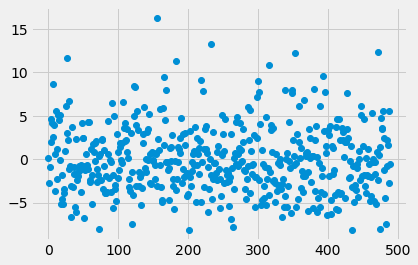

In [334]:
plt.style.use('fivethirtyeight')
fit_neg.resid.plot(style='o')

## Did not change anything. Identical results. Now another feature reduction. With Lasso, or Ridge? Lets try manual, lasso and ridge

In [333]:
human_nfl_features_tbl = nfl_db_min_v2.drop(columns=['TOTAL_YDS_defender', 'PASS_CMP_defender', 'RUSH_YDS_defender',\
                                                    'FUMBLES_LOST_challenger', 'FUMBLES_LOST_defender', 'PENALTY_YDs_challenger',\
                                                    'PENALTY_YDs_defender'])

In [336]:
#human_nfl_features_tbl.shape
nfl_db_min_v2.shape

(490, 24)

In [360]:
y_orig, X_orig = patsy.dmatrices('Final ~ ' +\
 'TOTAL_YDS_challenger  + TOTAL_YDS_defender  + Turnovers_challenger  + Turnovers_defender  + '+\
 'PASS_CMP_challenger  + PASS_CMP_defender  + PASS_TDs_challenger  + PASS_TDs_defender  + '+\
 'PASS_INT_challenger  + PASS_INT_defender  + RUSH_YDS_challenger  + RUSH_YDS_defender  + RUSH_TDs_challenger  + '+\
 'RUSH_TDs_defender  + SACKS_challenger  + SACKS_defender  + FUMBLES_LOST_challenger  + FUMBLES_LOST_defender  + '+\
 'PENALTY_YDs_challenger  + '+\
 'PENALTY_YDs_defender', data=nfl_db_min_v2, return_type='dataframe')
#data=nfl_db_min_features // Before changing dtypes of total yds and turnovers

In [363]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# X, y -> Minimal Model

### Test Setup
X, X_test, y, y_test = train_test_split(X_orig, y_orig, test_size=.2, random_state=42)
X_val, X_train, y_val, y_train = train_test_split(X, y, test_size=.3, random_state=22)
###

scaler = StandardScaler()

###Models
linear_model = LinearRegression()
lasso = Lasso(alpha=5)
ridge = Ridge(alpha=5)
poly_model = LinearRegression()
###




#### Scale
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)
X_val_scaled = scaler.transform(X_val.values)

####

### Polynomials
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train.values)
X_test_poly = poly_features.transform(X_test.values)
X_val_poly = poly_features.transform(X_val.values)
###


linear_model.fit(X_train, y_train)
ridge.fit(X_train_scaled, y_train)
poly_model.fit(X_train_poly, y_train)
lasso.fit(X_train_scaled, y_train)


human_feature_r2 = linear_model.score(X_val, y_val)
poly_feature_r2 = poly_model.score(X_val_poly, y_val)

lasso_feature_r2 = lasso.score(X_val_scaled, y_val)
ridge_feature_r2 = ridge.score(X_val_scaled, y_val)

print(f'The scores for the regression tests are:'+'\n\t'+ f'Human {(human_feature_r2):.4f}'+'\n\t'+ f' RIDGE: {(ridge_feature_r2):.4f}' +'\n\t'+  f'POLY: {(poly_feature_r2):.4f}'+'\n\t'+ f'LASSO: {(lasso_feature_r2):.4f}')



The scores for the regression tests are:
	Human 0.8204
	 RIDGE: 0.8192
	POLY: -2.2336
	LASSO: 0.3607


In [ ]:
nfl_db_min_v2

In [322]:
nfl_db_neg_def_stats.head()

,Final,index_challenger,index_defender,TEAM,TOTAL_YDS_challenger,TOTAL_YDS_defender,Turnovers_challenger,Turnovers_defender,PASS_CMP_challenger,PASS_CMP_defender,...,RUSH_YDS_challenger,RUSH_YDS_defender,RUSH_TDs_challenger,RUSH_TDs_defender,SACKS_challenger,SACKS_defender,FUMBLES_LOST_challenger,FUMBLES_LOST_defender,PENALTY_YDs_challenger,PENALTY_YDs_defender
0,18,PHI,ATL,Philadelphia Eagles,232,299,2,1,20,21,...,113,74,2,1,2,4,1,0,101,135
1,12,ATL,PHI,Atlanta Falcons,299,232,1,2,21,20,...,74,113,1,2,4,2,0,1,135,101
2,24,MIN,SFO,Minnesota Vikings,343,327,1,4,20,15,...,116,90,0,0,3,3,1,1,52,21
3,16,SFO,MIN,San Francisco 49ers,327,343,4,1,15,20,...,90,116,0,0,3,3,1,1,21,52
4,27,MIA,TEN,Miami Dolphins,342,336,2,3,20,20,...,120,116,0,1,1,0,0,0,51,48


In [289]:
mini_features = {'SCALARS': ['First Downs_challenger',
  'Turnovers_challenger',
  'Turnovers_challenger',
  'Final',
  'WEEK',
  'First Downs_defender',
  'PASS_CMP_challenger',
  'PASS_ATT_challenger',
  'PASS_INT_challenger',
  'PASS_CMP_defender',
  'PASS_ATT_defender',
  'PASS_INT_defender',
  'RUSH_ATT_challenger',
  'RUSH_ATT_defender',
  'SACKS_challenger',
  'SACKS_defender',
  'FUMBLES_challenger',
  'FUMBLES_LOST_challenger',
  'FUMBLES_defender',
  'FUMBLES_LOST_defender',
  'PENALTIES_challenger',
  'PENALTIES_defender'],
 'YARDS': ['Net Pass Yards_challenger',
  'Total Yards_challenger',
  'Net Pass Yards_defender',
  'Total Yards_defender',
  'Turnovers_defender',
  'PASS_YDs_challenger',
  'RUSH_YDS_challengerPASS_YDs_defender',
  'RUSH_YDS_defender',
  'SACK_YDs_challenger',
  'SACK_YDs_defender',
  'PENALTY_YDs_challenger',
  'PENALTY_YDs_defender'],
 'SCORES': ['PASS_TDs_challenger',
  'PASS_TDs_defender',
  'RUSH_TDs_defender',
  'RUSH_TDs_challenger']}

{'SCALARS': ['First Downs_challenger',
  'Turnovers_challenger',
  'Turnovers_challenger',
  'Final',
  'WEEK',
  'First Downs_defender',
  'PASS_CMP_challenger',
  'PASS_ATT_challenger',
  'PASS_INT_challenger',
  'PASS_CMP_defender',
  'PASS_ATT_defender',
  'PASS_INT_defender',
  'RUSH_ATT_challenger',
  'RUSH_ATT_defender',
  'SACKS_challenger',
  'SACKS_defender',
  'FUMBLES_challenger',
  'FUMBLES_LOST_challenger',
  'FUMBLES_defender',
  'FUMBLES_LOST_defender',
  'PENALTIES_challenger',
  'PENALTIES_defender'],
 'YARDS': ['Net Pass Yards_challenger',
  'Total Yards_challenger',
  'Net Pass Yards_defender',
  'Total Yards_defender',
  'Turnovers_defender',
  'PASS_YDs_challenger',
  'RUSH_YDS_challengerPASS_YDs_defender',
  'RUSH_YDS_defender',
  'SACK_YDs_challenger',
  'SACK_YDs_defender',
  'PENALTY_YDs_challenger',
  'PENALTY_YDs_defender'],
 'SCORES': ['PASS_TDs_challenger',
  'PASS_TDs_defender',
  'RUSH_TDs_defender',
  'RUSH_TDs_challenger']}

### Misc

In [239]:
X_nfl_train.values.head()

NameError: name 'X_nfl_train' is not defined

## Trying to normalize/Regularization. features 

In [190]:


to_drop = list(np.array(nfl_plus_dummies.columns.tolist())[[0,5,6,7,8,9,10,11,12,14,15,20,21,22]])

nfl_db_lean = nfl_plus_dummies.drop(to_drop, axis=1)



In [ ]:
from sklearn.preprocessing import normalize


In [238]:
import patsy


The above tells me that I need to take a closer look at this table in respect to the model. The raw values and Betas, not simply correlations, becaseu there doesn't seem to be that many strong correlations.

In [181]:
nfl_db_lean.corr()

,PASS_CMP_challenger,PASS_ATT_challenger,PASS_YDs_challenger,PASS_TDs_challenger,PASS_INT_challenger,PASS_CMP_defender,PASS_ATT_defender,PASS_YDs_defender,PASS_TDs_defender,PASS_INT_defender,...,OAK_defender,PHI_defender,PIT_defender,SEA_defender,SFO_defender,TAM_defender,TEN_defender,WAS_defender,AWAY,HOME
PASS_CMP_challenger,1.000000,0.867033,0.754781,0.220136,0.128195,-0.075367,-0.153576,0.088159,0.225761,-0.155391,...,-0.102826,0.078092,0.031404,7.703902e-03,-0.019176,0.064475,-0.052247,0.017132,-2.144746e-02,2.144746e-02
PASS_ATT_challenger,0.867033,1.000000,0.634073,0.068609,0.290990,-0.153576,-0.216531,0.020746,0.208793,-0.161925,...,-0.099764,0.085520,0.021437,7.219992e-03,0.000540,-0.014784,-0.038467,-0.010334,2.399853e-03,-2.399853e-03
PASS_YDs_challenger,0.754781,0.634073,1.000000,0.521841,0.087916,0.088159,0.020746,0.218232,0.260187,-0.109922,...,-0.015877,0.056246,0.015203,8.588230e-03,-0.003385,0.062938,-0.055582,0.013921,-4.055183e-02,4.055183e-02
PASS_TDs_challenger,0.220136,0.068609,0.521841,1.000000,-0.086303,0.225761,0.208793,0.260187,0.210793,0.084114,...,0.096690,-0.062397,0.017147,1.022741e-03,0.086747,0.076804,-0.052454,0.010660,-5.994865e-02,5.994865e-02
PASS_INT_challenger,0.128195,0.290990,0.087916,-0.086303,1.000000,-0.155391,-0.161925,-0.109922,0.084114,-0.101345,...,-0.002279,-0.064316,-0.064316,4.908648e-05,-0.126354,-0.039501,-0.014686,0.024101,5.557180e-02,-5.557180e-02
PASS_CMP_defender,-0.075367,-0.153576,0.088159,0.225761,-0.155391,1.000000,0.867033,0.754781,0.220136,0.128195,...,0.031404,0.118945,0.204540,-1.469129e-01,-0.038629,0.087819,-0.132006,-0.079032,2.144746e-02,-2.144746e-02
PASS_ATT_defender,-0.153576,-0.216531,0.020746,0.208793,-0.161925,0.867033,1.000000,0.634073,0.068609,0.290990,...,-0.017570,0.064624,0.191398,-1.642686e-01,-0.010605,0.086914,-0.162455,-0.048142,-2.399853e-03,2.399853e-03
PASS_YDs_defender,0.088159,0.020746,0.218232,0.260187,-0.109922,0.754781,0.634073,1.000000,0.521841,0.087916,...,-0.018554,0.069779,0.162721,-7.933553e-02,0.033792,0.185622,-0.123987,-0.101965,4.055183e-02,-4.055183e-02
PASS_TDs_defender,0.225761,0.208793,0.260187,0.210793,0.084114,0.220136,0.068609,0.521841,1.000000,-0.086303,...,-0.092226,0.017147,0.096690,7.812165e-02,0.007204,0.116576,-0.102169,-0.095351,5.994865e-02,-5.994865e-02
PASS_INT_defender,-0.155391,-0.161925,-0.109922,0.084114,-0.101345,0.128195,0.290990,0.087916,-0.086303,1.000000,...,-0.051909,0.010129,0.022536,-7.210804e-02,0.096981,0.146611,-0.014686,0.024101,-5.557180e-02,5.557180e-02


In [168]:
list(np.array(nfl_plus_dummies.columns.tolist())[[0,5,6,7,8,9,10,11,12,13,14,15,20,21,22]])

['index_challenger',
 'Fourth Down Conv._challenger',
 'Time of Possession_challenger',
 'HOME_OR_AWAY',
 'TEAM',
 '1',
 '2',
 '3',
 '4',
 'Final',
 'WEEK',
 'index_defender',
 'Third Down Conv._defender',
 'Fourth Down Conv._defender',
 'Time of Possession_defender']

In [158]:
list(np.array(nfl_plus_dummies.columns.tolist())[[0,5,6,7,8,9,10,11,12,13,14,15,20,21,22]])

['index_challenger',
 'Fourth Down Conv._challenger',
 'Time of Possession_challenger',
 'HOME_OR_AWAY',
 'TEAM',
 '1',
 '2',
 '3',
 '4',
 'Final',
 'WEEK',
 'index_defender',
 'Third Down Conv._defender',
 'Fourth Down Conv._defender',
 'Time of Possession_defender']

In [196]:
with open ('nfl.db.2.0.0.dummies.pkl', 'wb') as fl:
           pickle.dump(nfl_db_lean, fl)
fl.close()

In [22]:
df[['Final']].var()

Final    106.054276
dtype: float64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


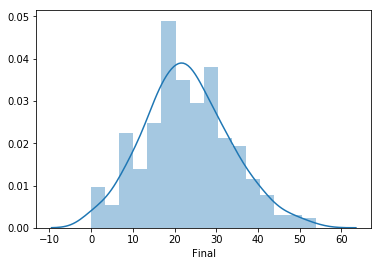

In [25]:
sns.distplot(df['Final'])

# Adding Polynomials

In [34]:
#Build a smaller data frame with my selected features

sub_features = df.loc[:,['Final', 'HOME_OR_AWAY', 'PASS_CMP_challenger', 'PASS_ATT_challenger', 'PASS_YDs_challenger',\
                        'PASS_INT_challenger', 'PASS_TDs_challenger', 'RUSH_ATT_challenger', 'RUSH_YDs_challenger', 'RUSH_TDs_challenger',\
                        'SACK_YDs_defender', 'FUMBLES_LOST_challenger', 'PENALTY_YDs_challenger', 'FUMBLES_LOST_defender',\
                        'PENALTY_YDs_defender', 'TOP_int_challenger']]

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [37]:
sub_features.columns

Index(['Final', 'HOME_OR_AWAY', 'PASS_CMP_challenger', 'PASS_ATT_challenger',
       'PASS_YDs_challenger', 'PASS_INT_challenger', 'PASS_TDs_challenger',
       'RUSH_ATT_challenger', 'RUSH_YDs_challenger', 'RUSH_TDs_challenger',
       'SACK_YDs_defender', 'FUMBLES_LOST_challenger',
       'PENALTY_YDs_challenger', 'FUMBLES_LOST_defender',
       'PENALTY_YDs_defender', 'TOP_int_challenger'],
      dtype='object')

In [36]:


yp, Xp = patsy.dmatrices('Final ~ HOME_OR_AWAY +' +\
                       'PASS_CMP_challenger + '+\
                       'PASS_ATT_challenger + ' +\
                       'PASS_YDs_challenger + ' +\
                       'PASS_TDs_challenger + ' +\
                       'PASS_INT_challenger + ' +\
                       'RUSH_ATT_challenger + ' +\
                       'RUSH_YDS_challenger + ' +\
                       'RUSH_TDs_challenger + ' +\
                       ##'RUSH_ATT_defender + ' +\
                       #'RUSH_YDS_defender + ' +\
                       ##'RUSH_TDs_defender + ' +\
                       #'SACKS_challenger + ' +\
                       #'SACK_YDs_challenger + ' +\
                       #'SACKS_defender + ' +\
                       'SACK_YDs_defender + ' +\
                       #'FUMBLES_challenger + ' +\
                       'FUMBLES_LOST_challenger + ' +\
                       #'PENALTIES_challenger +' +\
                       'PENALTY_YDs_challenger + ' +\
                       ##'PASS_CMP_defender + ' +\
                       #'PASS_ATT_defender + ' +\
                       #'PASS_YDs_defender + ' +\
                       ##'PASS_TDs_defender + ' +\
                       #'PASS_INT_defender + ' +\
                       #'FUMBLES_defender + ' +\
                       'FUMBLES_LOST_defender + ' +\
                       #'PENALTIES_defender +' +\
                       #'TOP_int_defender + ' +\
                       'PENALTY_YDs_defender + ' +\
                       'TOP_int_challenger', data=sub_features, return_type='dataframe')

model_p = sm.OLS(yp,Xp)

fit_p = model_p.fit()
                       


fit_p.summary()

PatsyError: Error evaluating factor: NameError: name 'RUSH_YDS_challenger' is not defined
    Final ~ HOME_OR_AWAY +PASS_CMP_challenger + PASS_ATT_challenger + PASS_YDs_challenger + PASS_TDs_challenger + PASS_INT_challenger + RUSH_ATT_challenger + RUSH_YDS_challenger + RUSH_TDs_challenger + SACK_YDs_defender + FUMBLES_LOST_challenger + PENALTY_YDs_challenger + FUMBLES_LOST_defender + PENALTY_YDs_defender + TOP_int_challenger
                                                                                                                                                              ^^^^^^^^^^^^^^^^^^^